In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import numpy as np
from pyuvdata import UVCal, UVData
import os
import sys
import glob
import uvtools as uvt
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, Angle
from astropy.coordinates import SkyCoord as sc
import pandas
import warnings 
import copy
from hera_notebook_templates import utils
import hera_qm
from hera_mc import cm_hookup
import h5py
import importlib
from scipy import stats
from IPython.display import display, HTML
from scipy.signal import find_peaks
#warnings.filterwarnings('ignore')

from scipy import signal
from numpy.fft import ifft
from numpy.random import default_rng

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
display(HTML("<style>.container { width:100% !important; }</style>"))

could not import sklearn


In [3]:
#get data location
JD = 2459513
data_path = '/lustre/aoc/projects/hera/dstorer/H5C_data/2459513'
ant_metrics_ext = ".known_good.ant_metrics.hdf5"
statuses = 'RF_ok,digital_ok,digital_maintenance,calibration_ok,RF_maintenance'
utc = Time(JD, format='jd').datetime
print(f'JD = {JD}')
print(f'Date = {utc.month}-{utc.day}-{utc.year}')
print(f'data_path = "{data_path}"')

JD = 2459513
Date = 10-25-2021
data_path = "/lustre/aoc/projects/hera/dstorer/H5C_data/2459513"


In [4]:
def plot_four_clocks (ant1, ant2, ant3, ant4):
    fig, ax = plt.subplots(2 , 2, figsize = (15,12))

    data1 = uvd.get_data(ant1,ant1,'XX')
    data2 = uvd.get_data(ant1,ant1,'YY')
    freq = uvd.freq_array[0]*1e-6 #converted to MegaHz

    clocks1, _ = find_peaks(np.average(data1, axis=0), distance=400)
    clocks2, _ = find_peaks(np.average(data2, axis=0), distance=400)
    ax[0,0].plot(freq,np.average(data1, axis=0))
    ax[0,0].plot(freq[clocks1],np.average(data1, axis=0)[clocks1],"xr")
    ax[0,0].plot(freq,np.average(data2, axis=0))
    ax[0,0].plot(freq[clocks2],np.average(data2, axis=0)[clocks2],"xr")
    #ax[0,0].set_yscale('log')
    ax[0,0].set_xlabel(f'Frequency (MHz) of antenna {ant1}')

    data3 = uvd.get_data(ant2,ant2,'XX')
    data4 = uvd.get_data(ant2,ant2,'YY')
    freq = uvd.freq_array[0]*1e-6 #converted to MegaHz

    clocks3, _ = find_peaks(np.average(data3, axis=0), distance=400)
    clocks4, _ = find_peaks(np.average(data4, axis=0), distance=400)
    ax[0,1].plot(freq,np.average(data3, axis=0))
    ax[0,1].plot(freq[clocks3],np.average(data3, axis=0)[clocks3],"xr")
    ax[0,1].plot(freq,np.average(data4, axis=0))
    ax[0,1].plot(freq[clocks4],np.average(data4, axis=0)[clocks4],"xr")
   # ax[0,1].set_yscale('log')
    ax[0,1].set_xlabel(f'Frequency (MHz) of antenna {ant2}')

    data5 = uvd.get_data(ant3,ant3,'XX')
    data6 = uvd.get_data(ant3,ant3,'YY')
    freq = uvd.freq_array[0]*1e-6 #converted to MegaHz

    clocks5, _ = find_peaks(np.average(data5, axis=0), distance=400)
    clocks6, _ = find_peaks(np.average(data6, axis=0), distance=400)
    ax[1,0].plot(freq,np.average(data5, axis=0))
    ax[1,0].plot(freq[clocks5],np.average(data5, axis=0)[clocks5],"xr")
    ax[1,0].plot(freq,np.average(data6, axis=0))
    ax[1,0].plot(freq[clocks6],np.average(data6, axis=0)[clocks6],"xr")
    #ax[1,0].set_yscale('log')
    ax[1,0].set_xlabel(f'Frequency (MHz) of antenna {ant3}')

    data7 = uvd.get_data(ant4,ant4,'XX')
    data8 = uvd.get_data(ant4,ant4,'YY')
    freq = uvd.freq_array[0]*1e-6 #converted to MegaHz

    clocks7, _ = find_peaks(np.average(data7, axis=0), distance=400)
    clocks8, _ = find_peaks(np.average(data8, axis=0), distance=400)
    fig = plt.figure(figsize=(12,12))
    ax[1,1].plot(freq,np.average(data7, axis=0))
    ax[1,1].plot(freq[clocks7],np.average(data7, axis=0)[clocks7],"xr")
    ax[1,1].plot(freq,np.average(data8, axis=0))
    ax[1,1].plot(freq[clocks8],np.average(data8, axis=0)[clocks8],"xr")
    #ax[1,1].set_yscale('log')
    ax[1,1].set_xlabel(f'Frequency (MHz) of antenna {ant4}')

    #fig = plt.figure(figsize=(12,12))
    #plt.plot(freq,data1[187,:])
    #plt.plot(freq,data2[187,:])
    #plt.yscale('log')
    #plt.xlabel('Frequency (MHz)')
    #print (len(freq))
    print (freq[128], freq[640], freq[1152])
    print (freq[128], freq[640], freq[1152])

In [5]:
def plot_four_noclocks_even (ant1, ant2, ant3, ant4, start, space, num):
    #print(clocks1)
    # print((-np.average(data1, axis=0)).argsort()[:3])
    fig, ax = plt.subplots(2 , 2, figsize = (15,12))
    
    #ax = axes[0, 0]
    
    data1 = uvd.get_data(ant1,ant1,'XX')
    data2 = uvd.get_data(ant1,ant1,'YY')
    data3 = uvd.get_data(ant2,ant2,'XX')
    data4 = uvd.get_data(ant2,ant2,'YY')
    data5 = uvd.get_data(ant3,ant3,'XX')
    data6 = uvd.get_data(ant3,ant3,'YY')
    data7 = uvd.get_data(ant4,ant4,'XX')
    data8 = uvd.get_data(ant4,ant4,'YY')
    freq = uvd.freq_array[0]*1e-6 #converted to MegaHz

    data1_avg = np.average(data1, axis=0)
    data1_avg[128] = (data1_avg[127] + data1_avg[129])/2
    data1_avg[1152] = (data1_avg[1151] + data1_avg[1153])/2
    data1_avg[640] = (data1_avg[639] + data1_avg[641])/2
    data2_avg = np.average(data2, axis=0)
    data2_avg[128] = (data2_avg[127] + data2_avg[129])/2
    data2_avg[1152] = (data2_avg[1151] + data2_avg[1153])/2
    data2_avg[640] = (data2_avg[639] + data2_avg[641])/2
    peaks1, _ = find_peaks(data1_avg[0:768], distance=40)
    print(peaks1)
    peaks2, _ = find_peaks(data2_avg[0:768], distance=40)
    ax[0,0].plot(freq[0:768],data1_avg[0:768], label = f'XX: first peak {freq[peaks1[0]]:.3f}')
    ax[0,0].plot(freq[peaks1],data1_avg[peaks1],"xr")
    ax[0,0].plot(freq[0:768],data2_avg[0:768], label = f'YY: first peak {freq[peaks2[0]]:.3f}')
    ax[0,0].plot(freq[peaks2],data2_avg[peaks2],"xr")
    ax[0,0].legend()
    
    axmin, axmax = ax[0,0].get_ylim()
    
    lines = np.arange(0,num,1)
    number = 0
        
    for i in lines:
        ax[0,0].vlines(start+space*number, ymin = 0, ymax = axmax, color = 'k', ls = '--')
        number = (number + 1)
        
    ax[0,0].set_yscale('log')
    ax[0,0].set_xlabel(f'Frequency (MHz) of antenna {ant1}')


    data3_avg = np.average(data3, axis=0)
    data3_avg[128] = (data3_avg[127] + data3_avg[129])/2
    data3_avg[1152] = (data3_avg[1151] + data3_avg[1153])/2
    data3_avg[640] = (data3_avg[639] + data3_avg[641])/2
    data4_avg = np.average(data4, axis=0)
    data4_avg[128] = (data4_avg[127] + data4_avg[129])/2
    data4_avg[1152] = (data4_avg[1151] + data4_avg[1153])/2
    data4_avg[640] = (data4_avg[639] + data4_avg[641])/2
    peaks3, _ = find_peaks(data3_avg[0:768], distance=40)
    peaks4, _ = find_peaks(data4_avg[0:768], distance=40)
    fig = plt.figure(figsize=(12,12))
    ax[0,1].plot(freq[0:768],data3_avg[0:768], label = f'XX: first peak {freq[peaks3][0]:.3f}')
    ax[0,1].plot(freq[peaks3],data3_avg[peaks3],"xr")
    ax[0,1].plot(freq[0:768],data4_avg[0:768], label = f'YY: first peak {freq[peaks4][0]:.3f}')
    ax[0,1].plot(freq[peaks4],data4_avg[peaks4],"xr")
    ax[0,1].legend()
    
    axmin, axmax = ax[0,1].get_ylim()
    number = 0
    
    for i in lines:
        ax[0,1].vlines(start+space*number, ymin = 0, ymax = axmax, color = 'k', ls = '--')
        number = (number + 1)

    ax[0,1].set_yscale('log')
    ax[0,1].set_xlabel(f'Frequency (MHz) of antenna {ant2}')

    data5_avg = np.average(data5, axis=0)
    data5_avg[128] = (data5_avg[127] + data5_avg[129])/2
    data5_avg[1152] = (data5_avg[1151] + data5_avg[1153])/2
    data5_avg[640] = (data5_avg[639] + data5_avg[641])/2
    data6_avg = np.average(data6, axis=0)
    data6_avg[128] = (data6_avg[127] + data6_avg[129])/2
    data6_avg[1152] = (data6_avg[1151] + data6_avg[1153])/2
    data6_avg[640] = (data6_avg[639] + data6_avg[641])/2
    peaks5, _ = find_peaks(data5_avg[0:768], distance=40)
    peaks6, _ = find_peaks(data6_avg[0:768], distance=40)
    fig = plt.figure(figsize=(12,12))
    ax[1,0].plot(freq[0:768],data5_avg[0:768], label = f'XX: first peak {freq[peaks5][0]:.3f}')
    ax[1,0].plot(freq[peaks5],data5_avg[peaks5],"xr")
    ax[1,0].plot(freq[0:768],data6_avg[0:768], label = f'YY: first peak {freq[peaks6][0]:.3f}')
    ax[1,0].plot(freq[peaks6],data6_avg[peaks6],"xr")
    ax[1,0].legend()
    
    axmin, axmax = ax[1,0].get_ylim()
    number = 0
    
    for i in lines:
        ax[1,0].vlines(start+space*number, ymin = 0, ymax = axmax, color = 'k', ls = '--')
        number = (number + 1)

    ax[1,0].set_yscale('log')
    ax[1,0].set_xlabel(f'Frequency (MHz) of antenna {ant3}')

    data7_avg = np.average(data7, axis=0)
    data7_avg[128] = (data7_avg[127] + data7_avg[129])/2
    data7_avg[1152] = (data7_avg[1151] + data7_avg[1153])/2
    data7_avg[640] = (data7_avg[639] + data7_avg[641])/2
    data8_avg = np.average(data8, axis=0)
    data8_avg[128] = (data8_avg[127] + data8_avg[129])/2
    data8_avg[1152] = (data8_avg[1151] + data8_avg[1153])/2
    data8_avg[640] = (data8_avg[639] + data8_avg[641])/2
    peaks7, _ = find_peaks(data7_avg[0:768], distance=40)
    peaks8, _ = find_peaks(data8_avg[0:768], distance=40)
    fig = plt.figure(figsize=(12,12))
    ax[1,1].plot(freq[0:768],data7_avg[0:768], label = f'XX: first peak {freq[peaks7][0]:.3f}')
    ax[1,1].plot(freq[peaks7],data7_avg[peaks7],"xr")
    ax[1,1].plot(freq[0:768],data8_avg[0:768], label = f'YY: first peak{freq[peaks8][0]:.3f}')
    ax[1,1].plot(freq[peaks8],data8_avg[peaks8],"xr")
    ax[1,1].legend()
    
    axmin, axmax = ax[1,1].get_ylim()
    number = 0
    
    for i in lines:
        ax[1,1].vlines(start+space*number, ymin = 0, ymax = axmax, color = 'k', ls = '--')
        number = (number + 1)

    ax[1,1].set_yscale('log')
    ax[1,1].set_xlabel(f'Frequency (MHz) of antenna {ant4}')

    print(freq[peaks1[0:11]])
    print(freq[peaks2[0:11]]) #difference in frequency is ~7.2MHz

In [7]:
# Load in data
HHfiles, difffiles, HHautos, diffautos, uvdx, uvdy = utils.load_data(data_path,JD)
    
uvd = UVData()
unread = True
readInd=0
while unread and readInd<len(HHautos):
    try:
        uvd.read(HHautos[readInd])
        unread = False
    except:
        readInd += 1
        continue
use_ants = utils.get_use_ants(uvd,statuses,JD)
print(f'This day contains {len(use_ants)} antennas of the given status category.')
uvd.read(HHautos[::10], skip_bad_files=True, antenna_nums = use_ants)
lsts = uvd.lst_array
uvdx.select(antenna_nums=use_ants)
uvdy.select(antenna_nums=use_ants)

IndexError: list index out of range

In [ ]:
print(use_ants)
print(np.unique(uvd.ant_1_array))

62.5457763671875 125.0457763671875 187.5457763671875
62.5457763671875 125.0457763671875 187.5457763671875


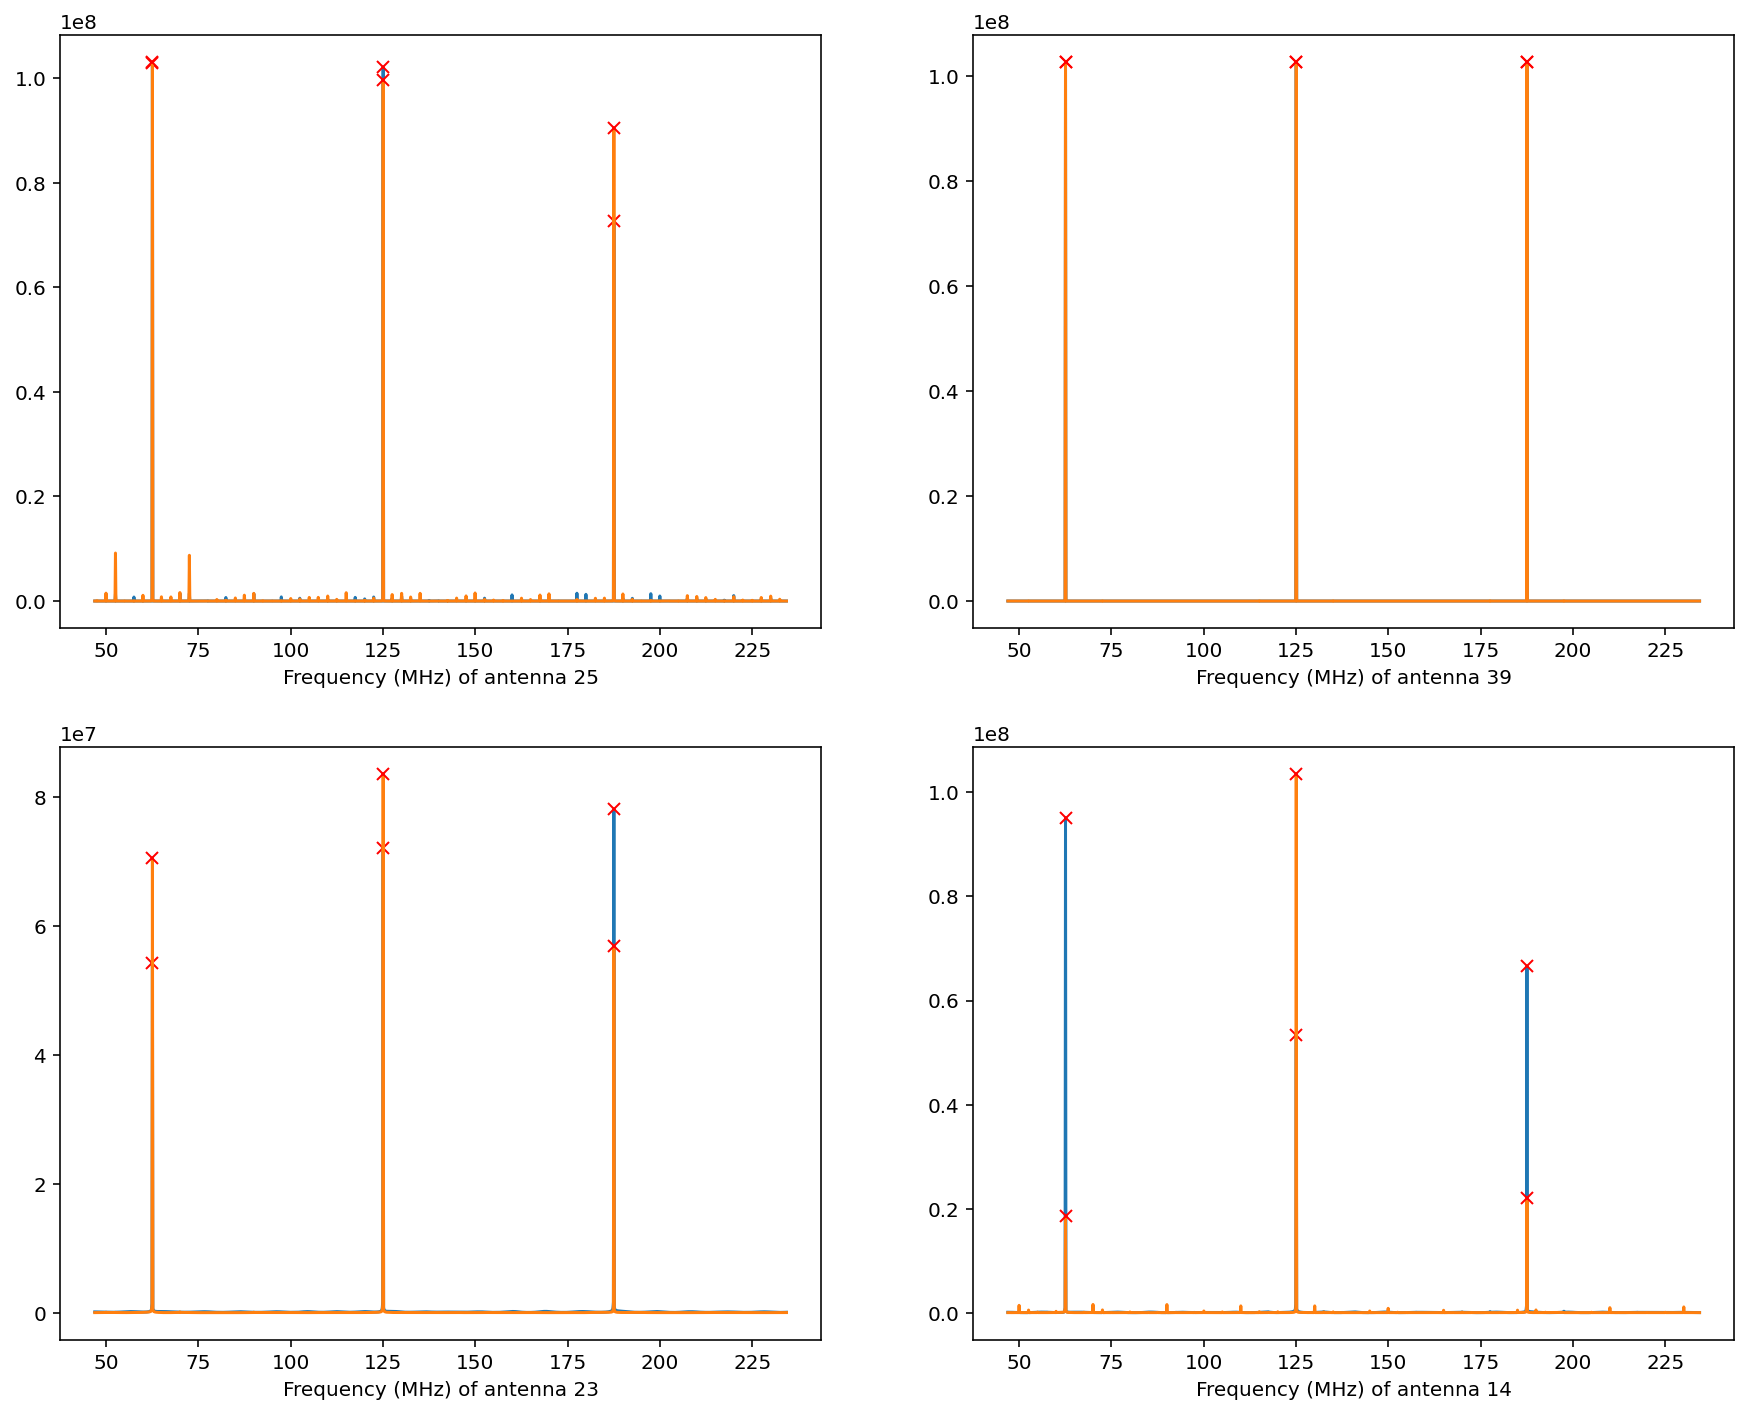

<Figure size 864x864 with 0 Axes>

In [7]:
plot_four_clocks(25, 39, 23, 14)

[  5  46  87 127 169 210 251 291 353 414 455 517 578 619 681 742]
[ 47.53112793  52.53601074  57.54089355  62.42370605  67.55065918
  72.55554199  77.5604248   82.4432373   90.01159668  97.45788574
 102.46276855]
[ 47.53112793  52.53601074  59.9822998   64.98718262  72.55554199
  80.00183105  85.00671387  90.01159668  95.01647949 100.0213623
 105.02624512]


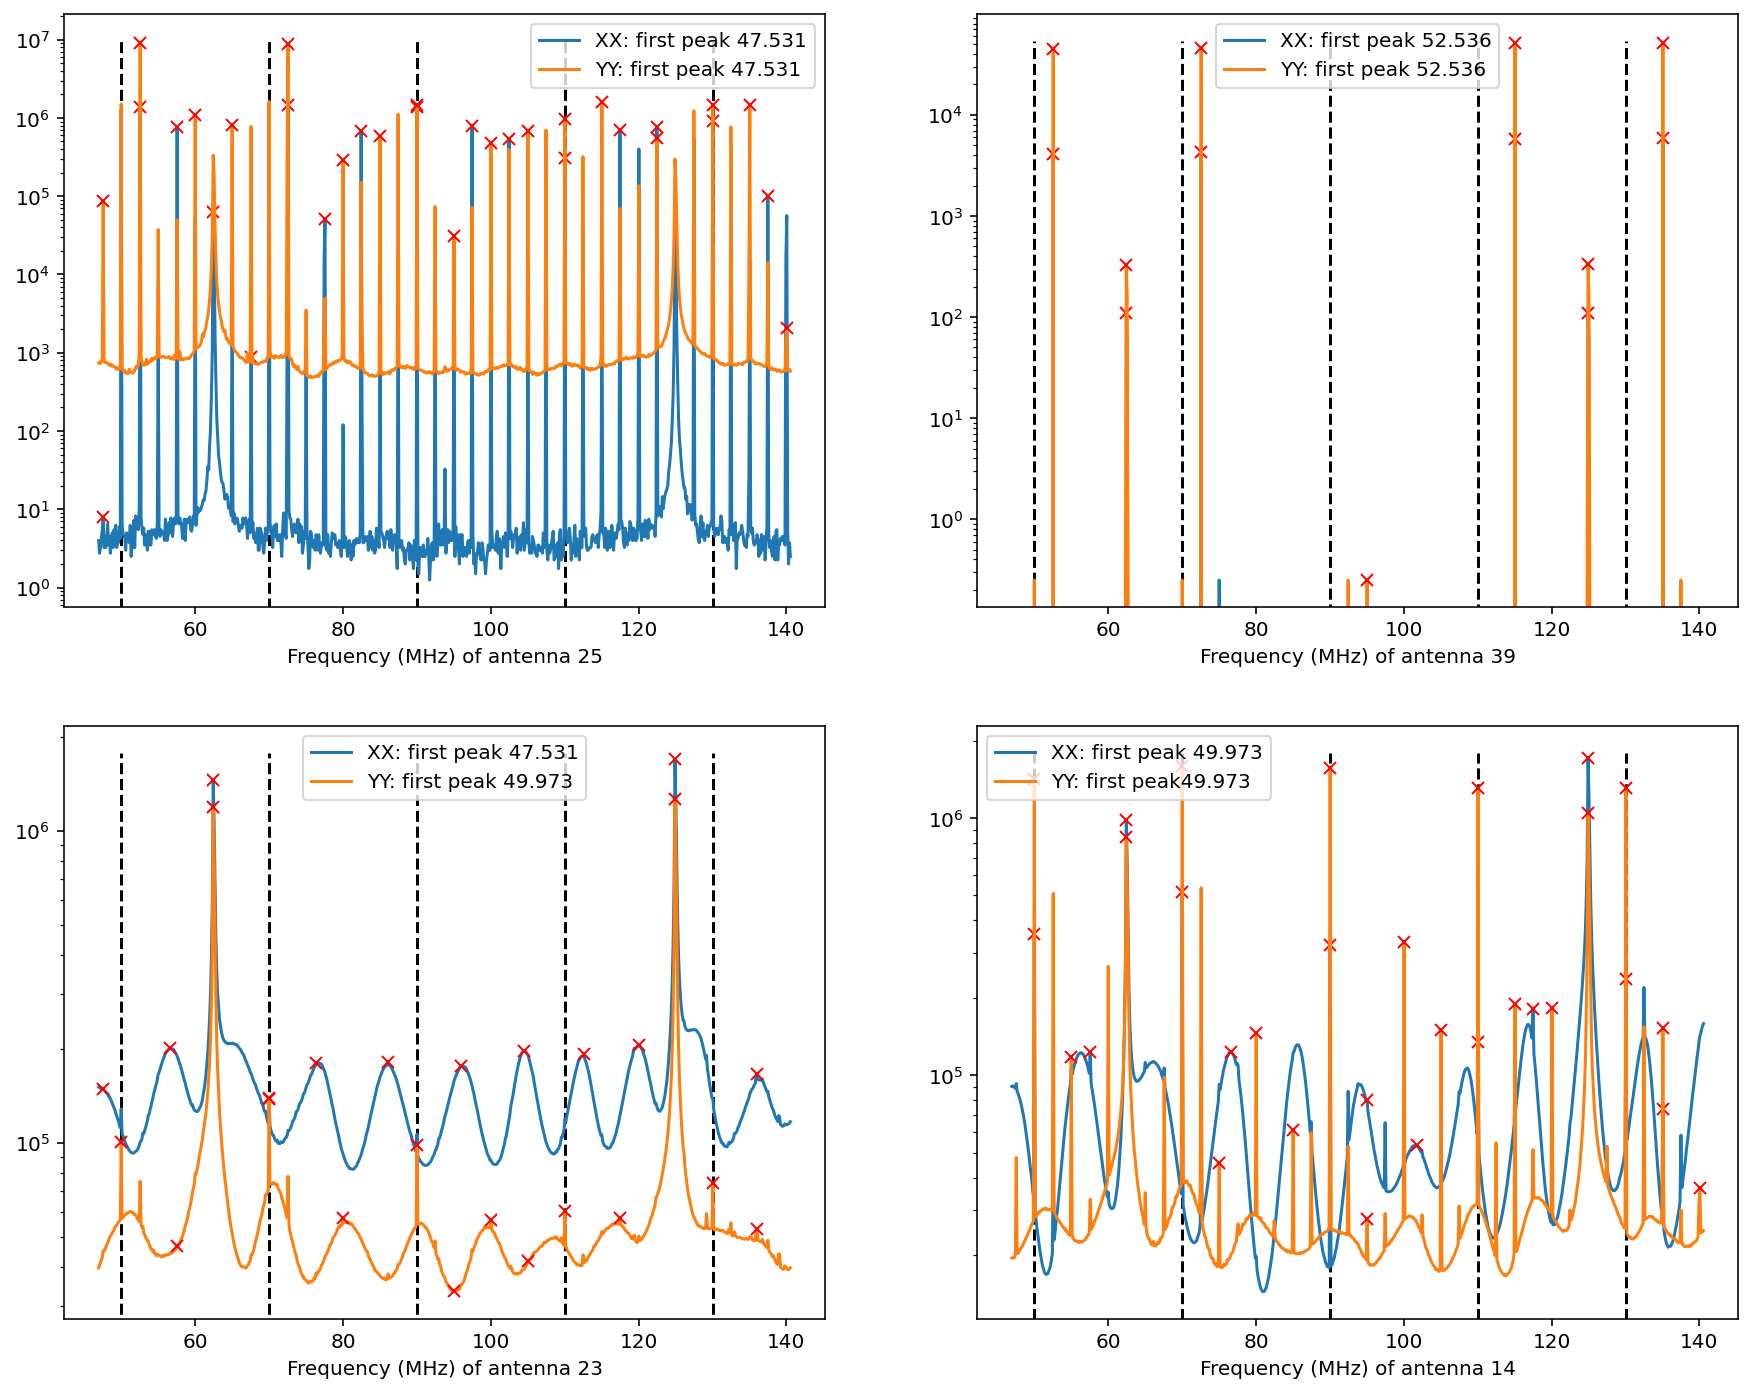

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [8]:
plot_four_noclocks_even(25, 39, 23, 14, 49.973, 20.025, 5)

62.5457763671875 125.0457763671875 187.5457763671875
62.5457763671875 125.0457763671875 187.5457763671875


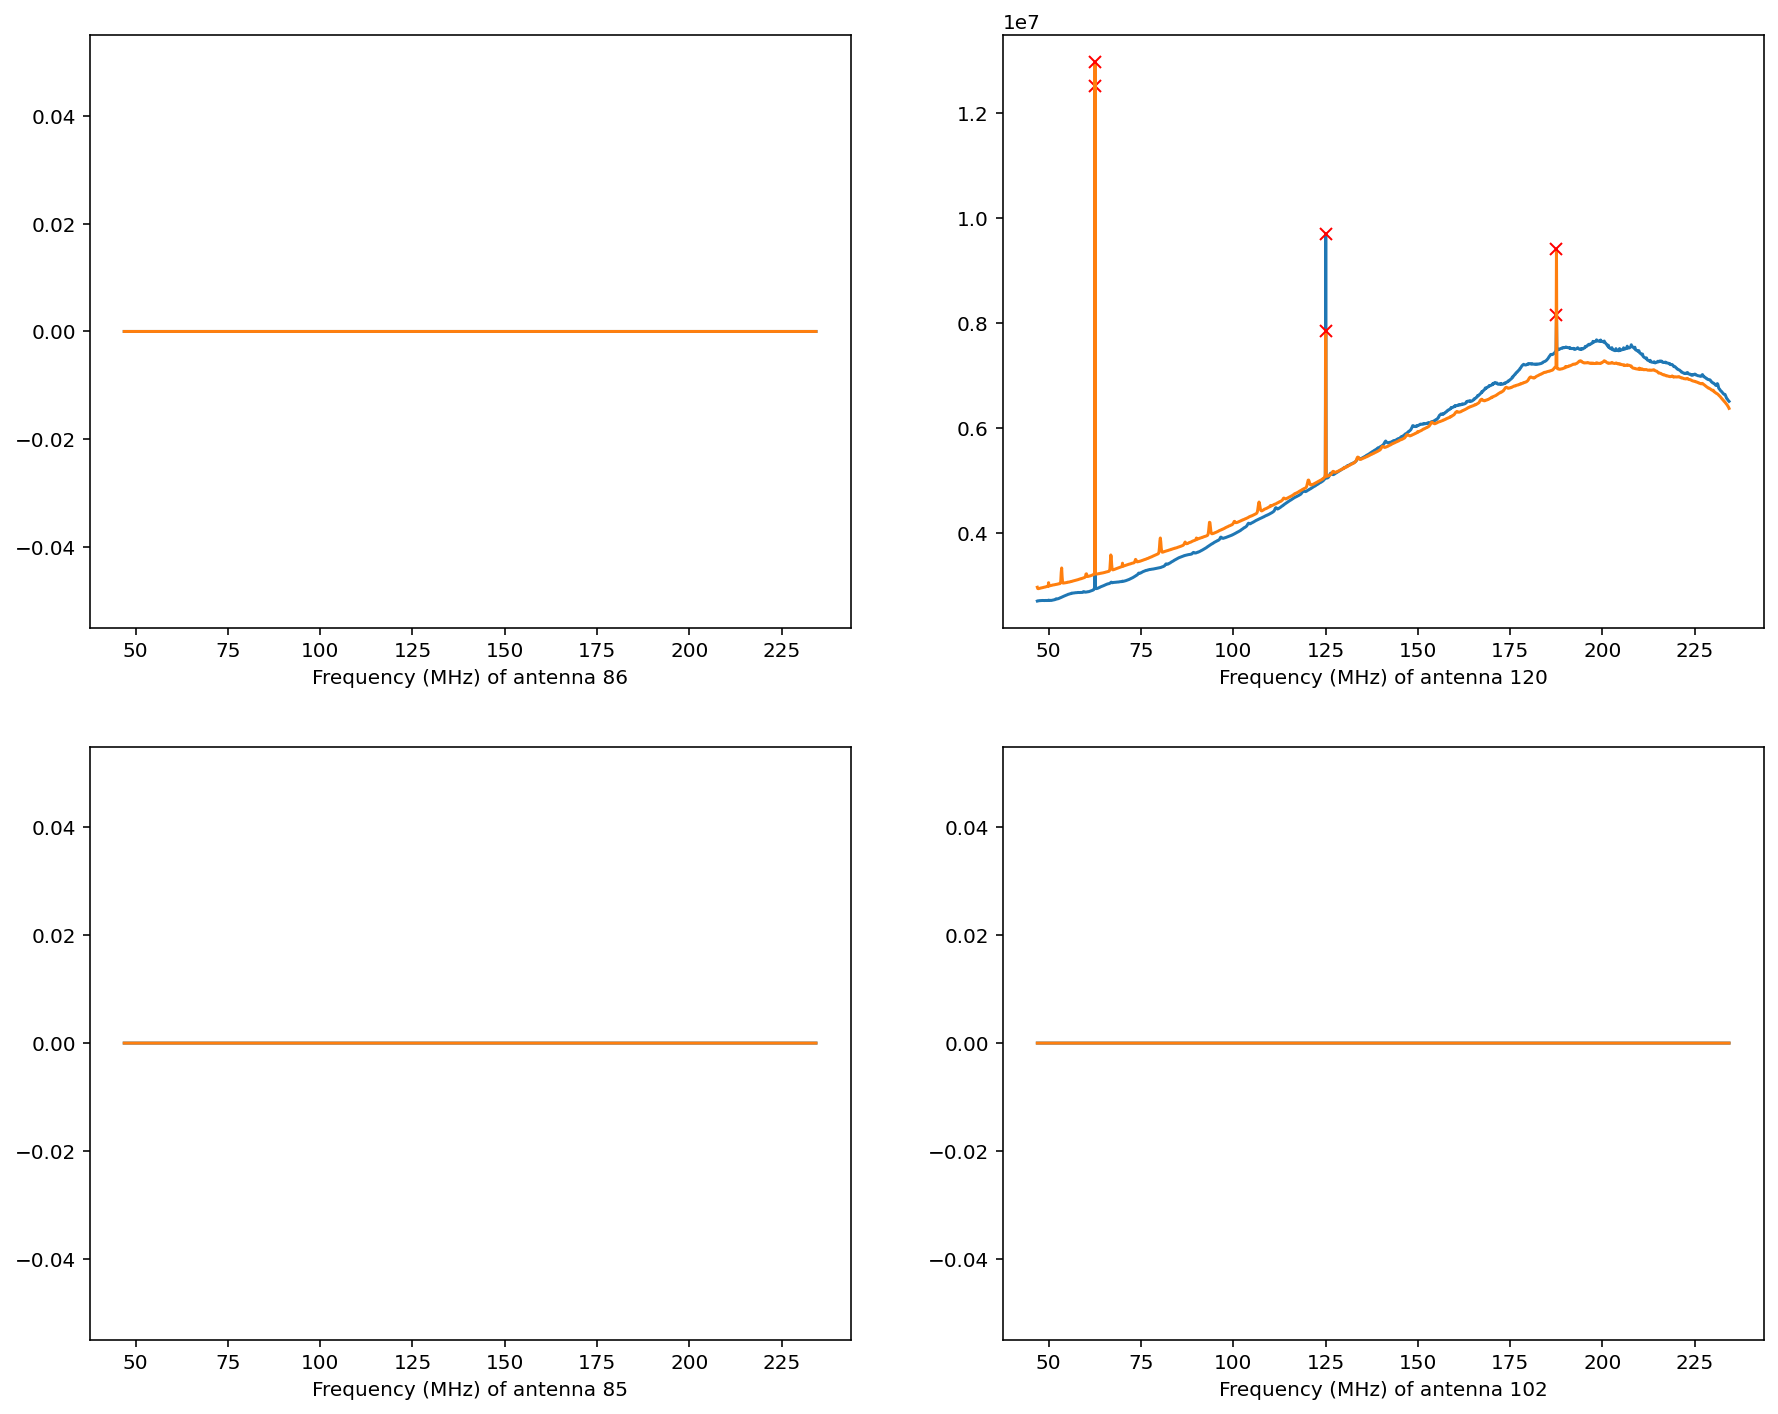

<Figure size 864x864 with 0 Axes>

In [15]:
plot_four_clocks(86, 120, 85, 102)

[ 25  98 164 206 260 313 367 420 488 528 582 639 689 743]


IndexError: index 0 is out of bounds for axis 0 with size 0

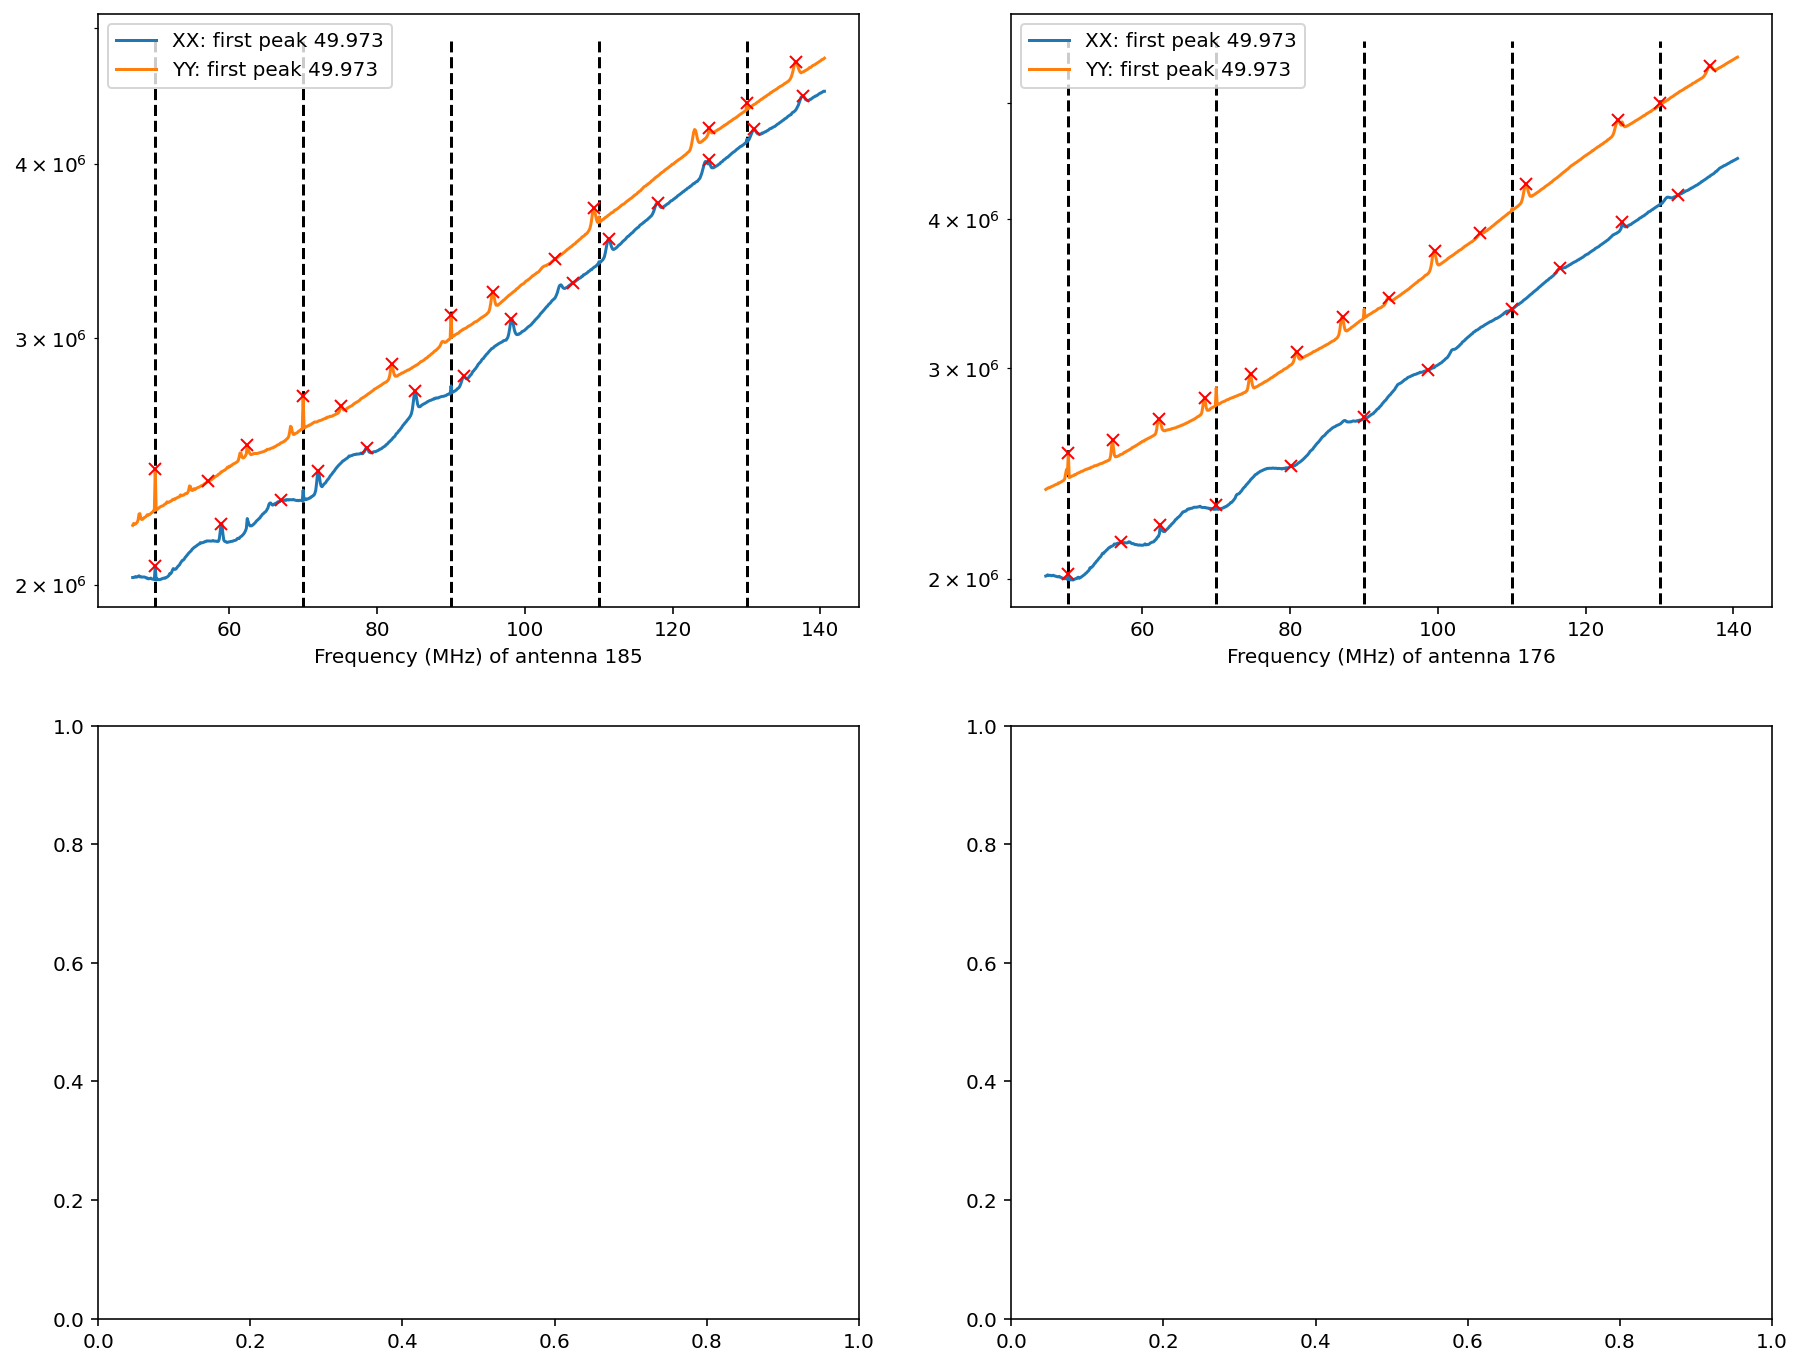

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [9]:
plot_four_noclocks_even(185, 176, 102, 3, 49.973, 20.025, 5)

[ 40  84 127 172 234 296 357 419 481 543 605 667 728]
[ 51.80358887  57.17468262  62.42370605  67.91687012  75.48522949
  83.05358887  90.49987793  98.0682373  105.63659668 113.20495605
 120.77331543]
[ 49.97253418  56.44226074  62.42370605  69.99206543  80.36804199
  90.01159668  95.01647949 102.46276855 109.66491699 116.98913574
 124.31335449]


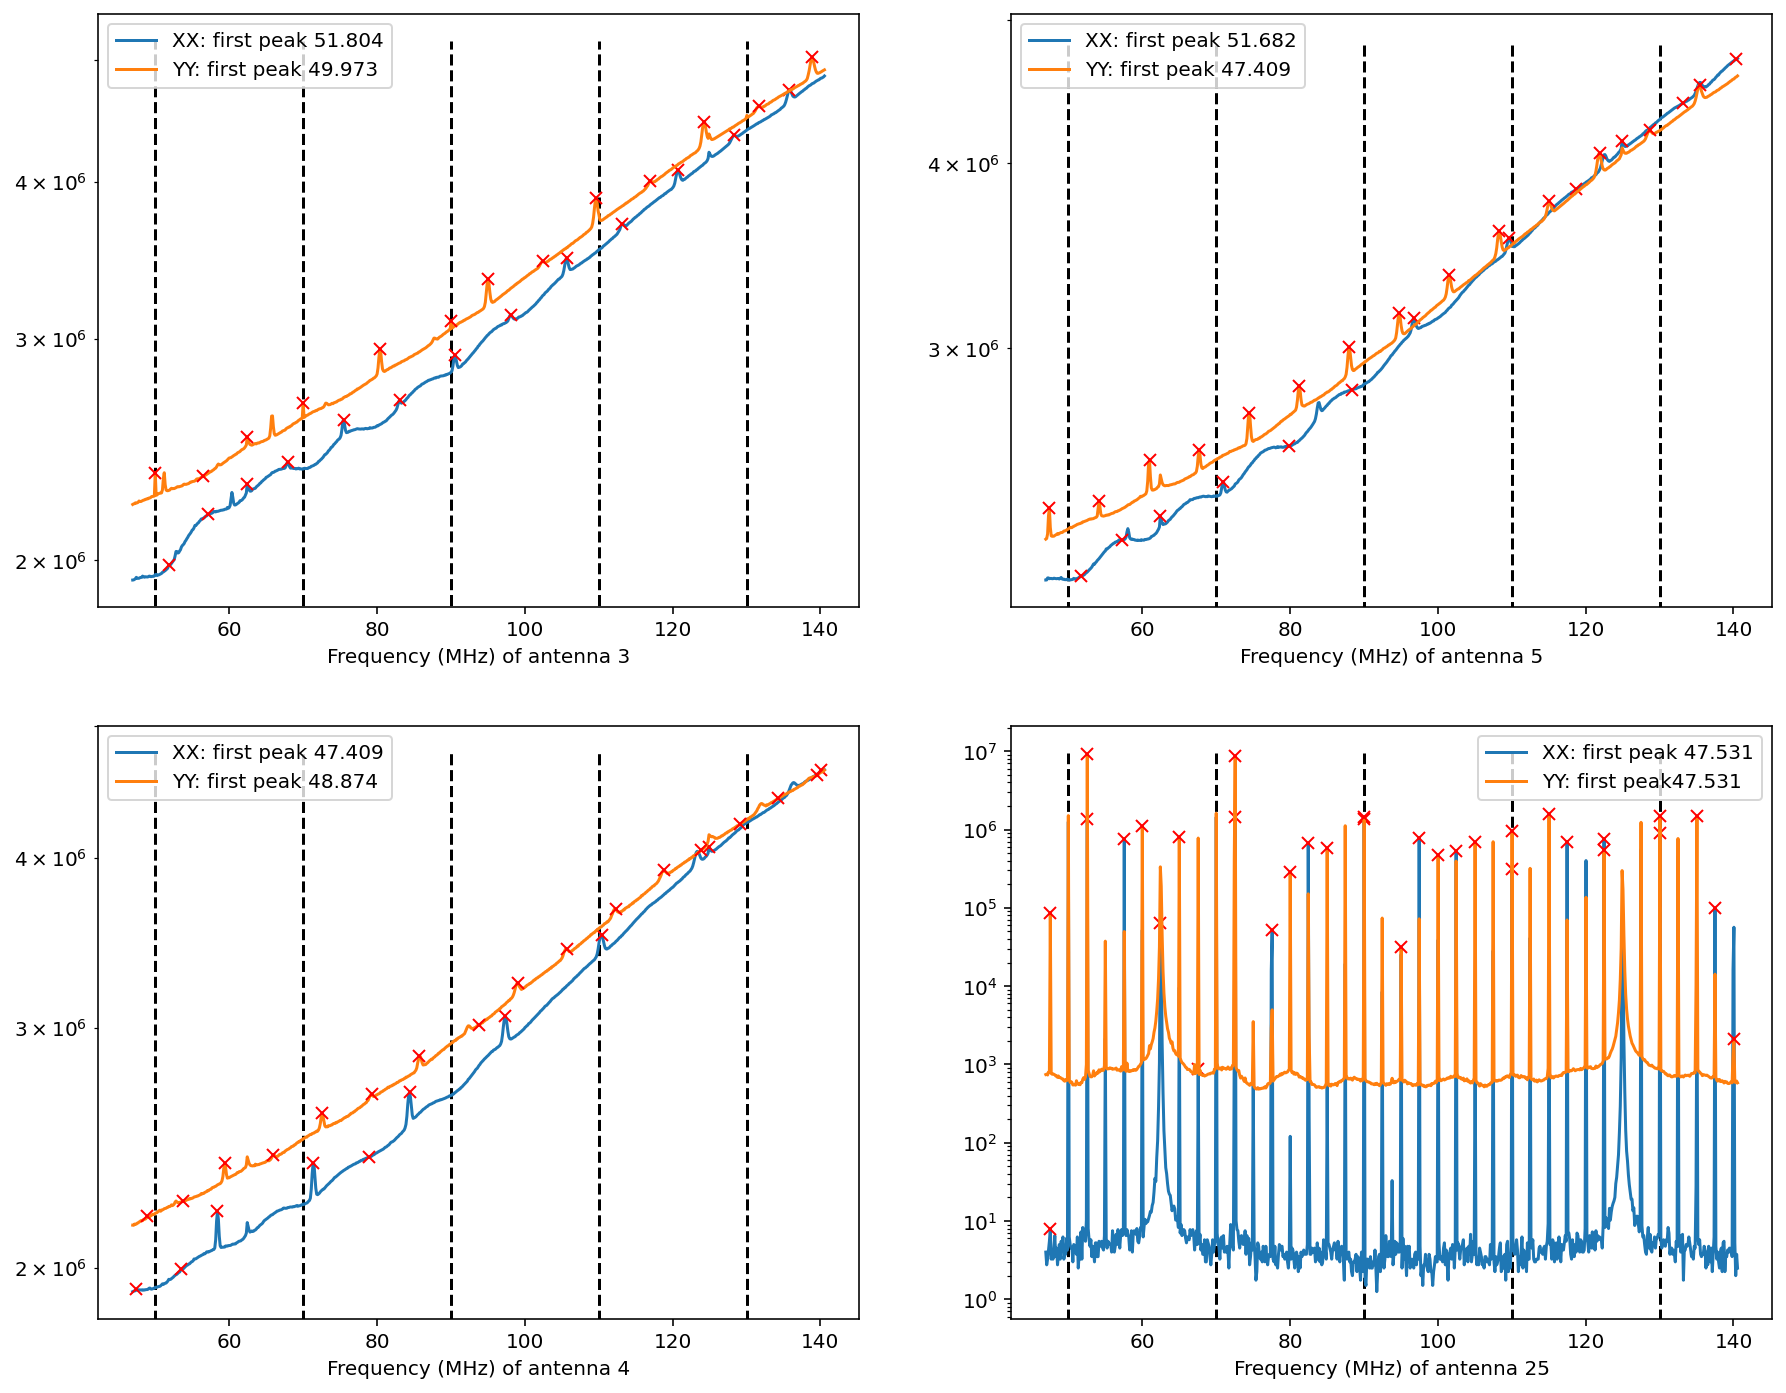

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [11]:
plot_four_noclocks_even(3, 5, 4, 25, 49.973, 20.025, 5)

[ 40  93 146 199 252 305 358 411 465 518 571 626 677 765]
[ 51.80358887  58.27331543  64.74304199  71.21276855  77.68249512
  84.15222168  90.62194824  97.0916748  103.68347168 110.15319824
 116.6229248 ]
[ 50.33874512  55.46569824  61.44714355  67.18444824  75.24108887
  80.61218262  87.20397949  95.1385498  103.07312012 111.00769043
 118.94226074]


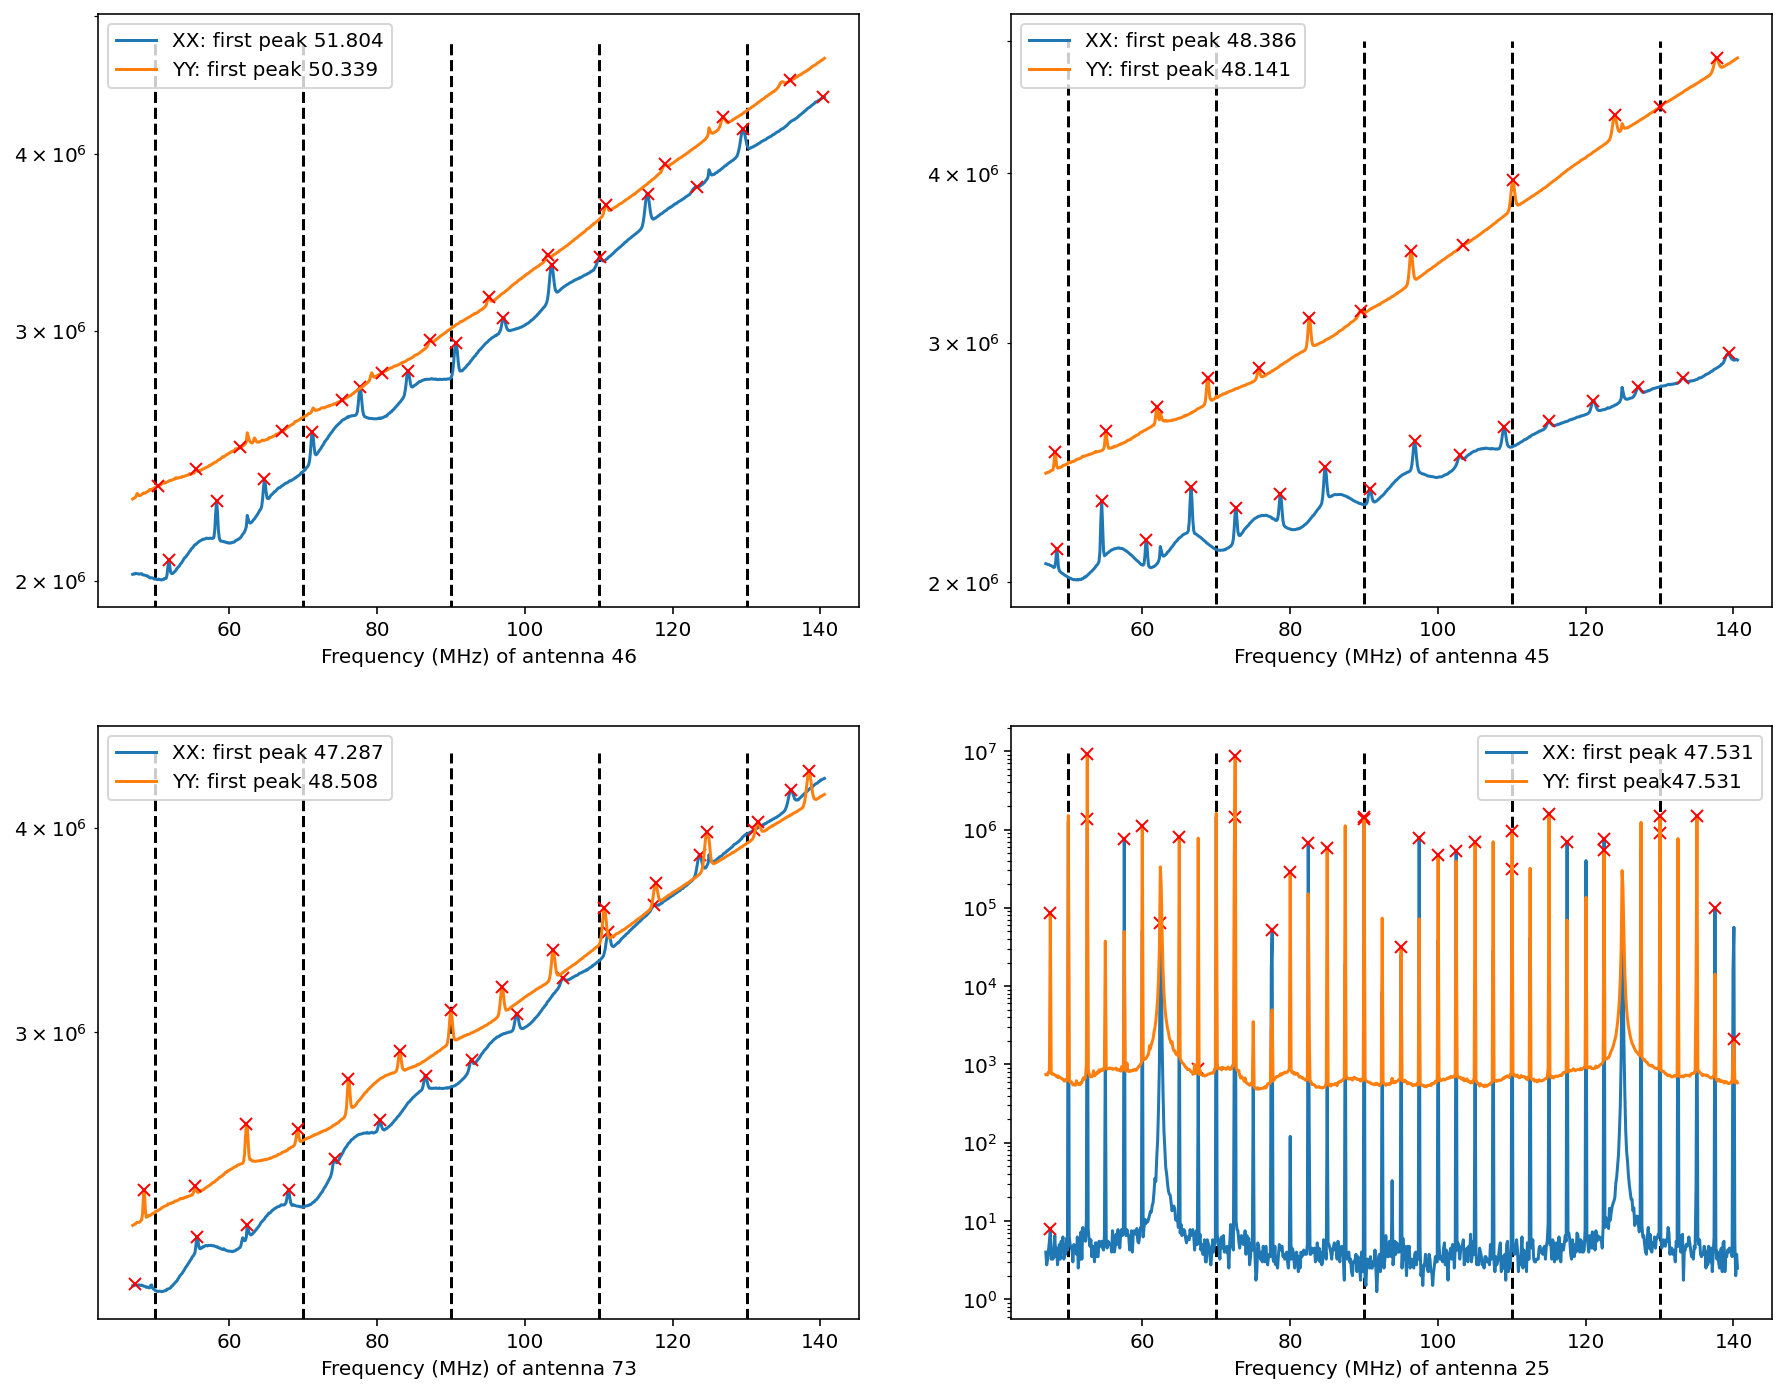

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [12]:
plot_four_noclocks_even(46, 45, 73, 25, 49.973, 20.025, 5)

[ 20  78 136 194 252 310 367 436 483 544 599 663 714 758]
[ 49.36218262  56.44226074  63.52233887  70.60241699  77.68249512
  84.76257324  91.72058105 100.14343262 105.8807373  113.32702637
 120.04089355]
[ 48.99597168  54.1229248   59.49401855  66.08581543  72.6776123
  79.26940918  85.98327637  92.57507324  99.16687012 105.75866699
 112.35046387]


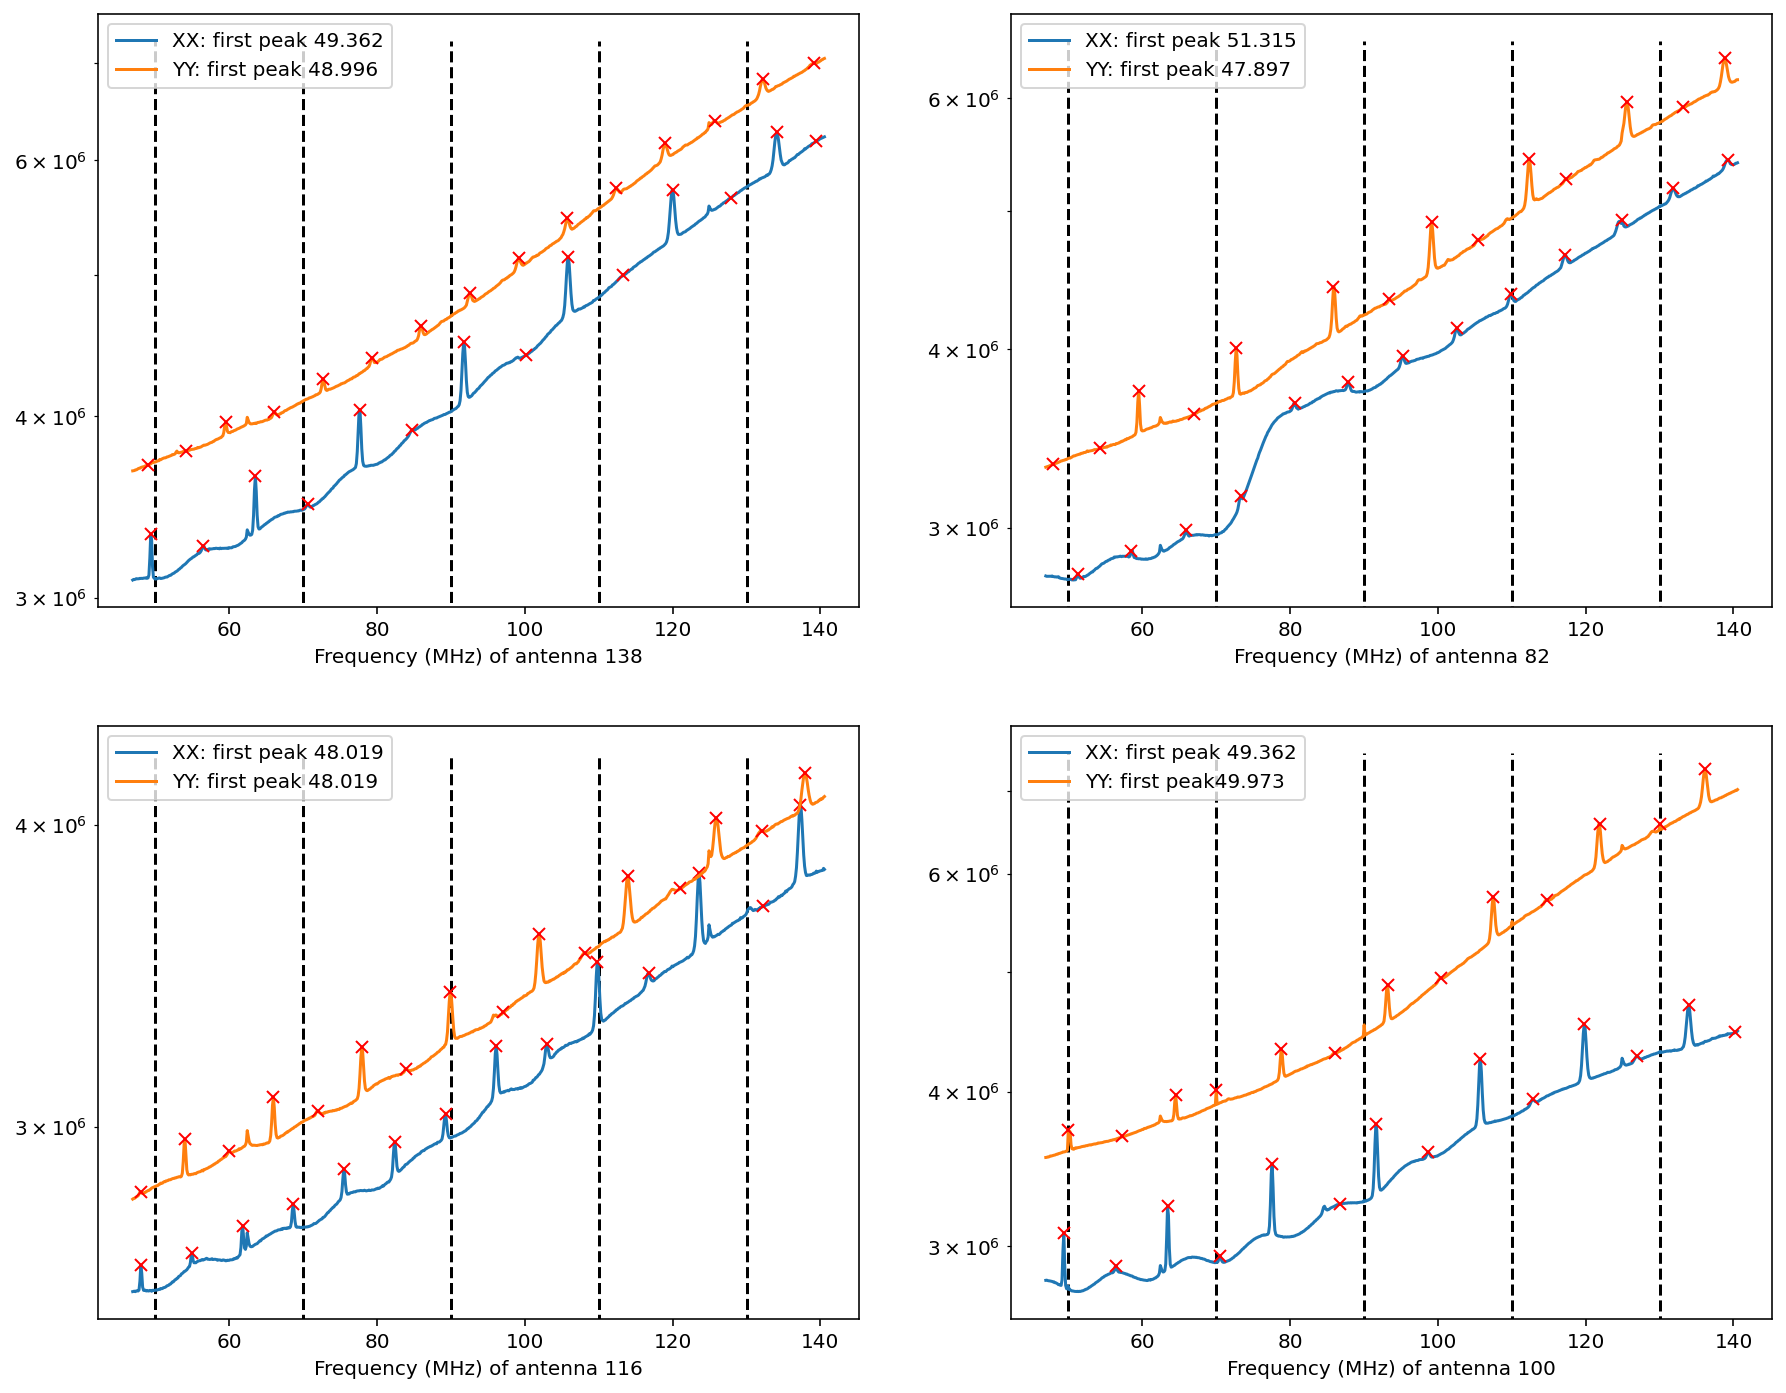

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [18]:
plot_four_noclocks_even(138, 82, 116, 100, 49.973, 20.025, 5)

[ 25  96 160 202 248 309 353 416 471 523 576 629 681 736]
[ 49.97253418  58.63952637  66.45202637  71.57897949  77.19421387
  84.64050293  90.01159668  97.70202637 104.41589355 110.7635498
 117.23327637]
[ 49.97253418  55.58776855  62.42370605  69.99206543  76.46179199
  83.4197998   90.37780762  97.21374512 104.17175293 111.12976074
 118.08776855]


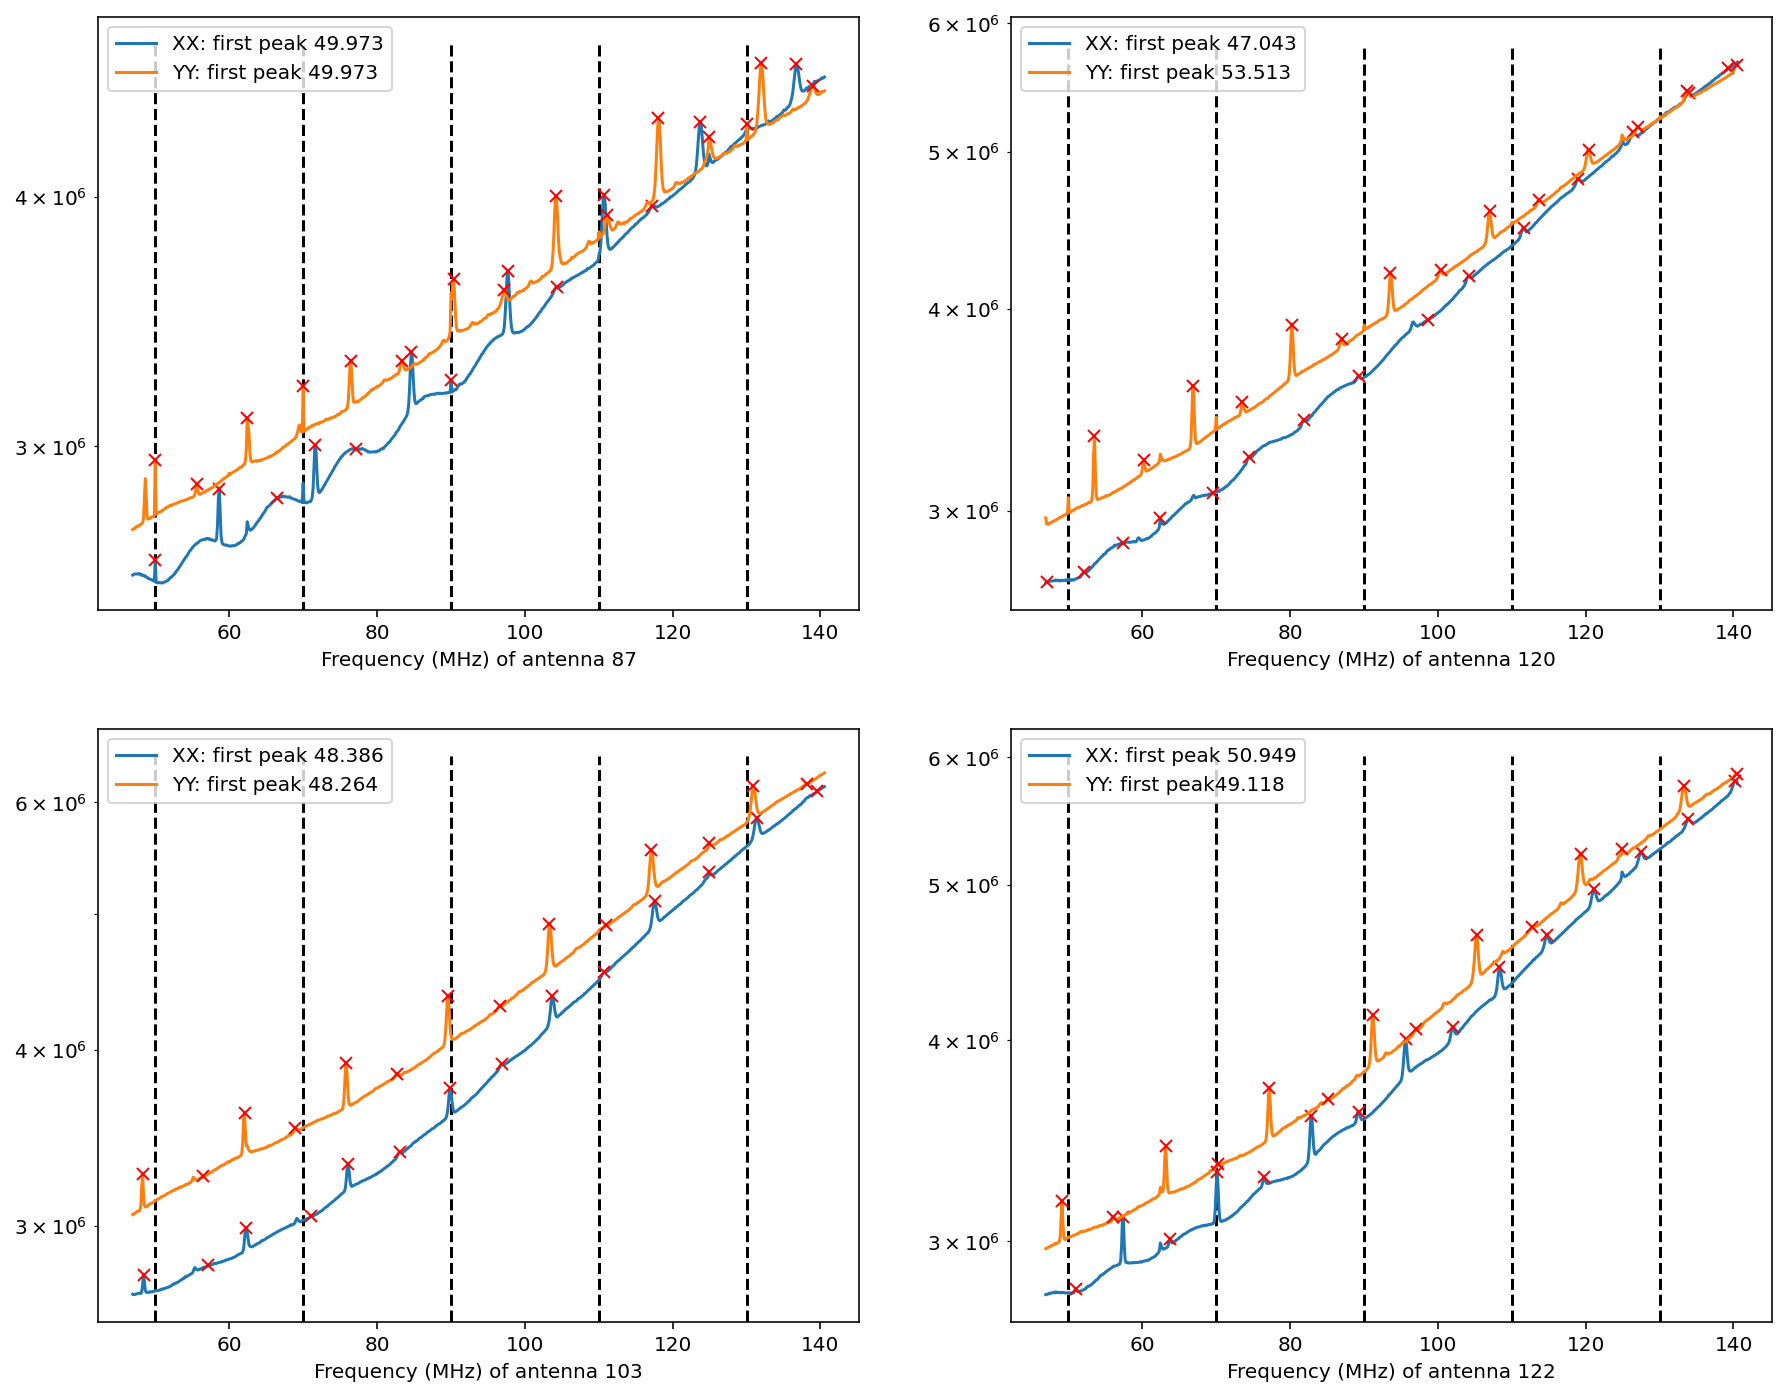

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [21]:
plot_four_noclocks_even(87, 120, 103, 122, 49.973, 20.025, 5)

[  7  84 127 200 270 342 413 519 586 639 686 732]
[ 47.77526855  57.17468262  62.42370605  71.33483887  79.87976074
  88.66882324  97.33581543 110.27526855 118.45397949 124.92370605
 130.66101074]
[ 49.97253418  56.44226074  62.42370605  69.99206543  75.97351074
  83.66394043  90.01159668  99.65515137 112.96081543 124.92370605
 130.05065918]


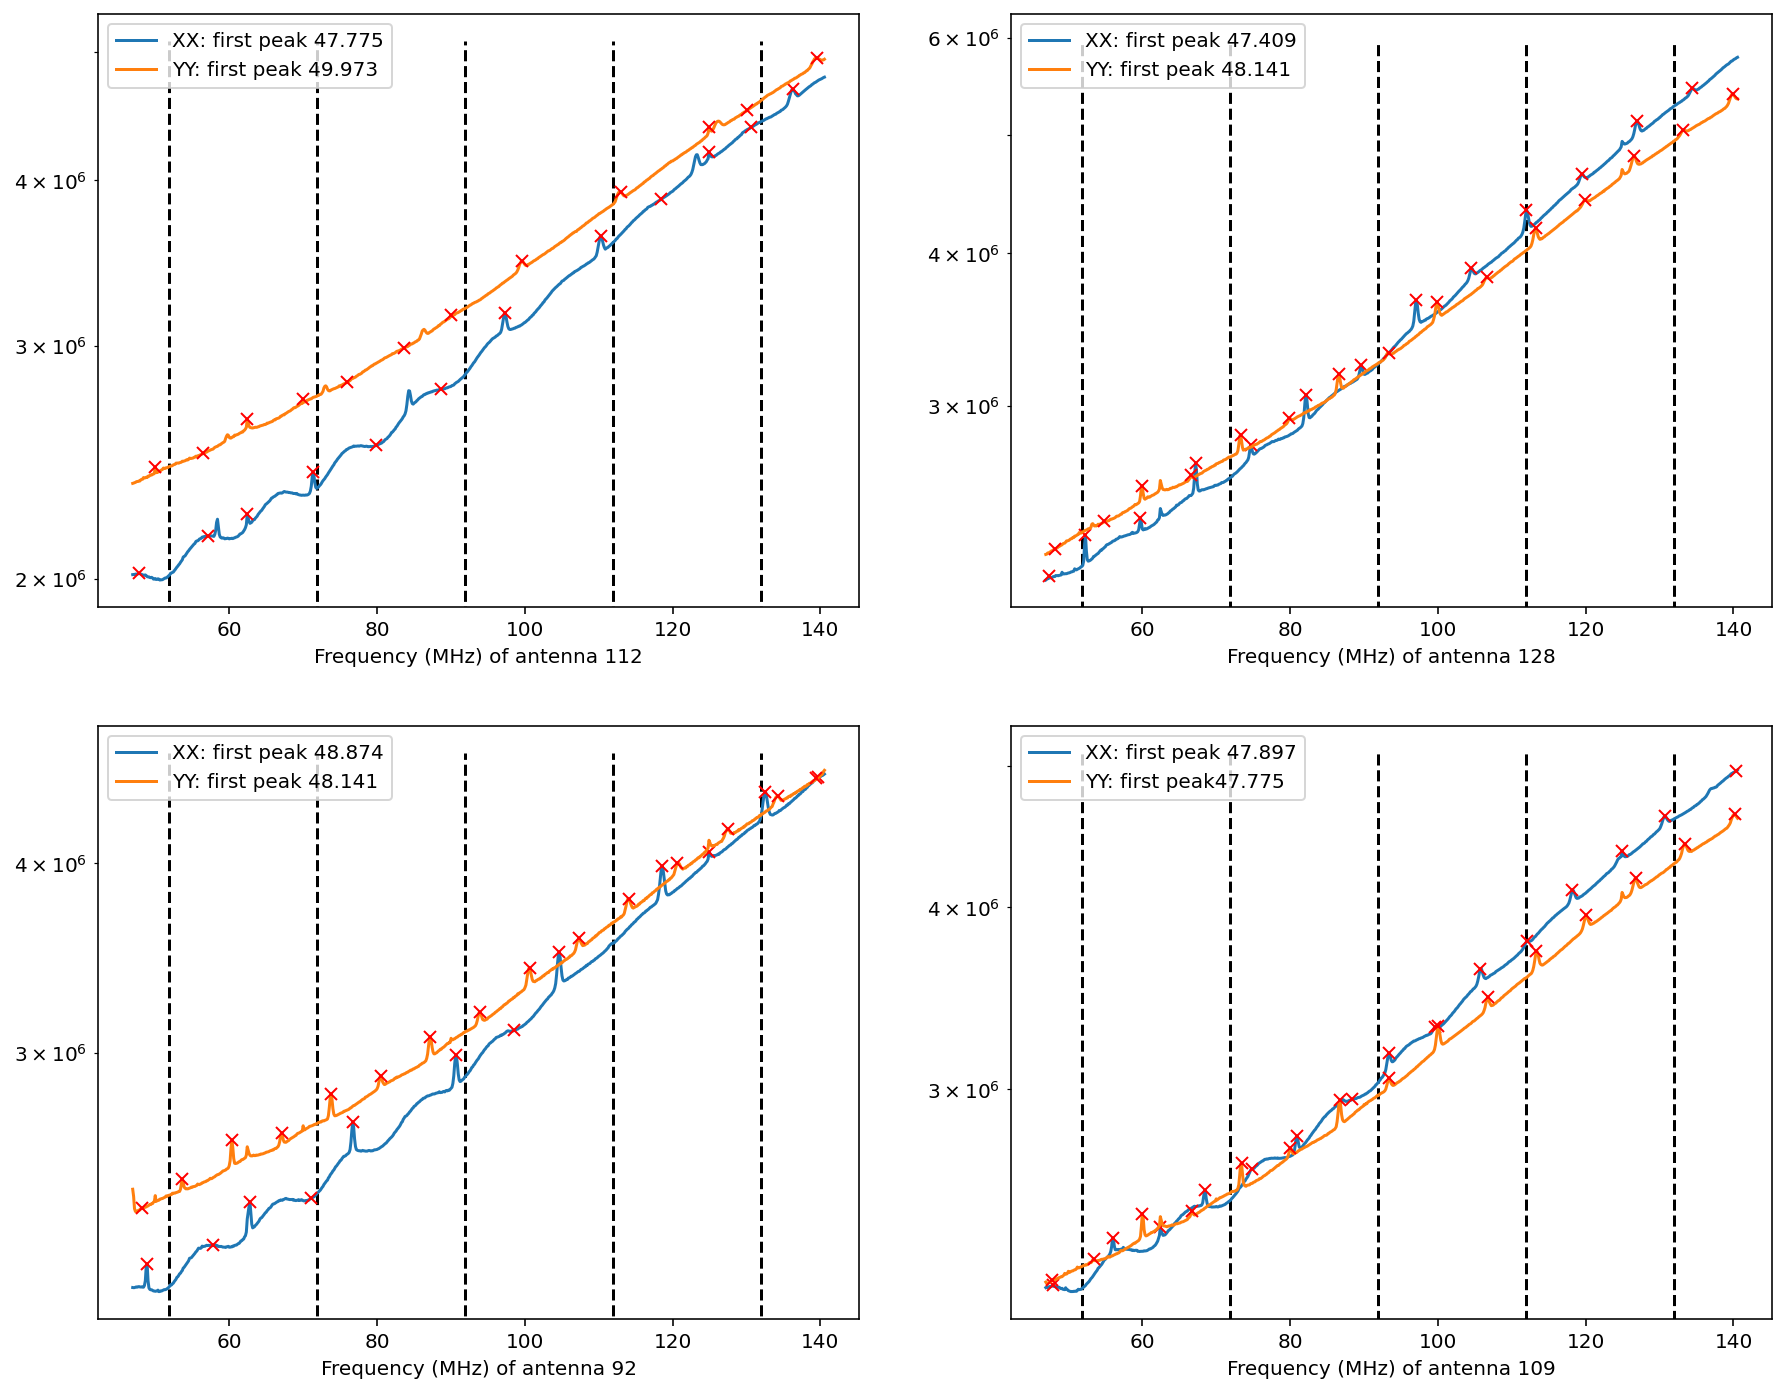

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [29]:
plot_four_noclocks_even(112, 128, 92, 109, 51.8, 20.025, 5)

[ 25  83 127 189 272 353 424 517 570 639 701]
[ 49.97253418  57.0526123   62.42370605  69.99206543  80.12390137
  90.01159668  98.67858887 110.03112793 116.50085449 124.92370605
 132.49206543]
[ 49.97253418  55.95397949  62.17956543  68.40515137  74.6307373
  80.85632324  87.08190918  93.30749512  99.53308105 105.75866699
 111.86218262]


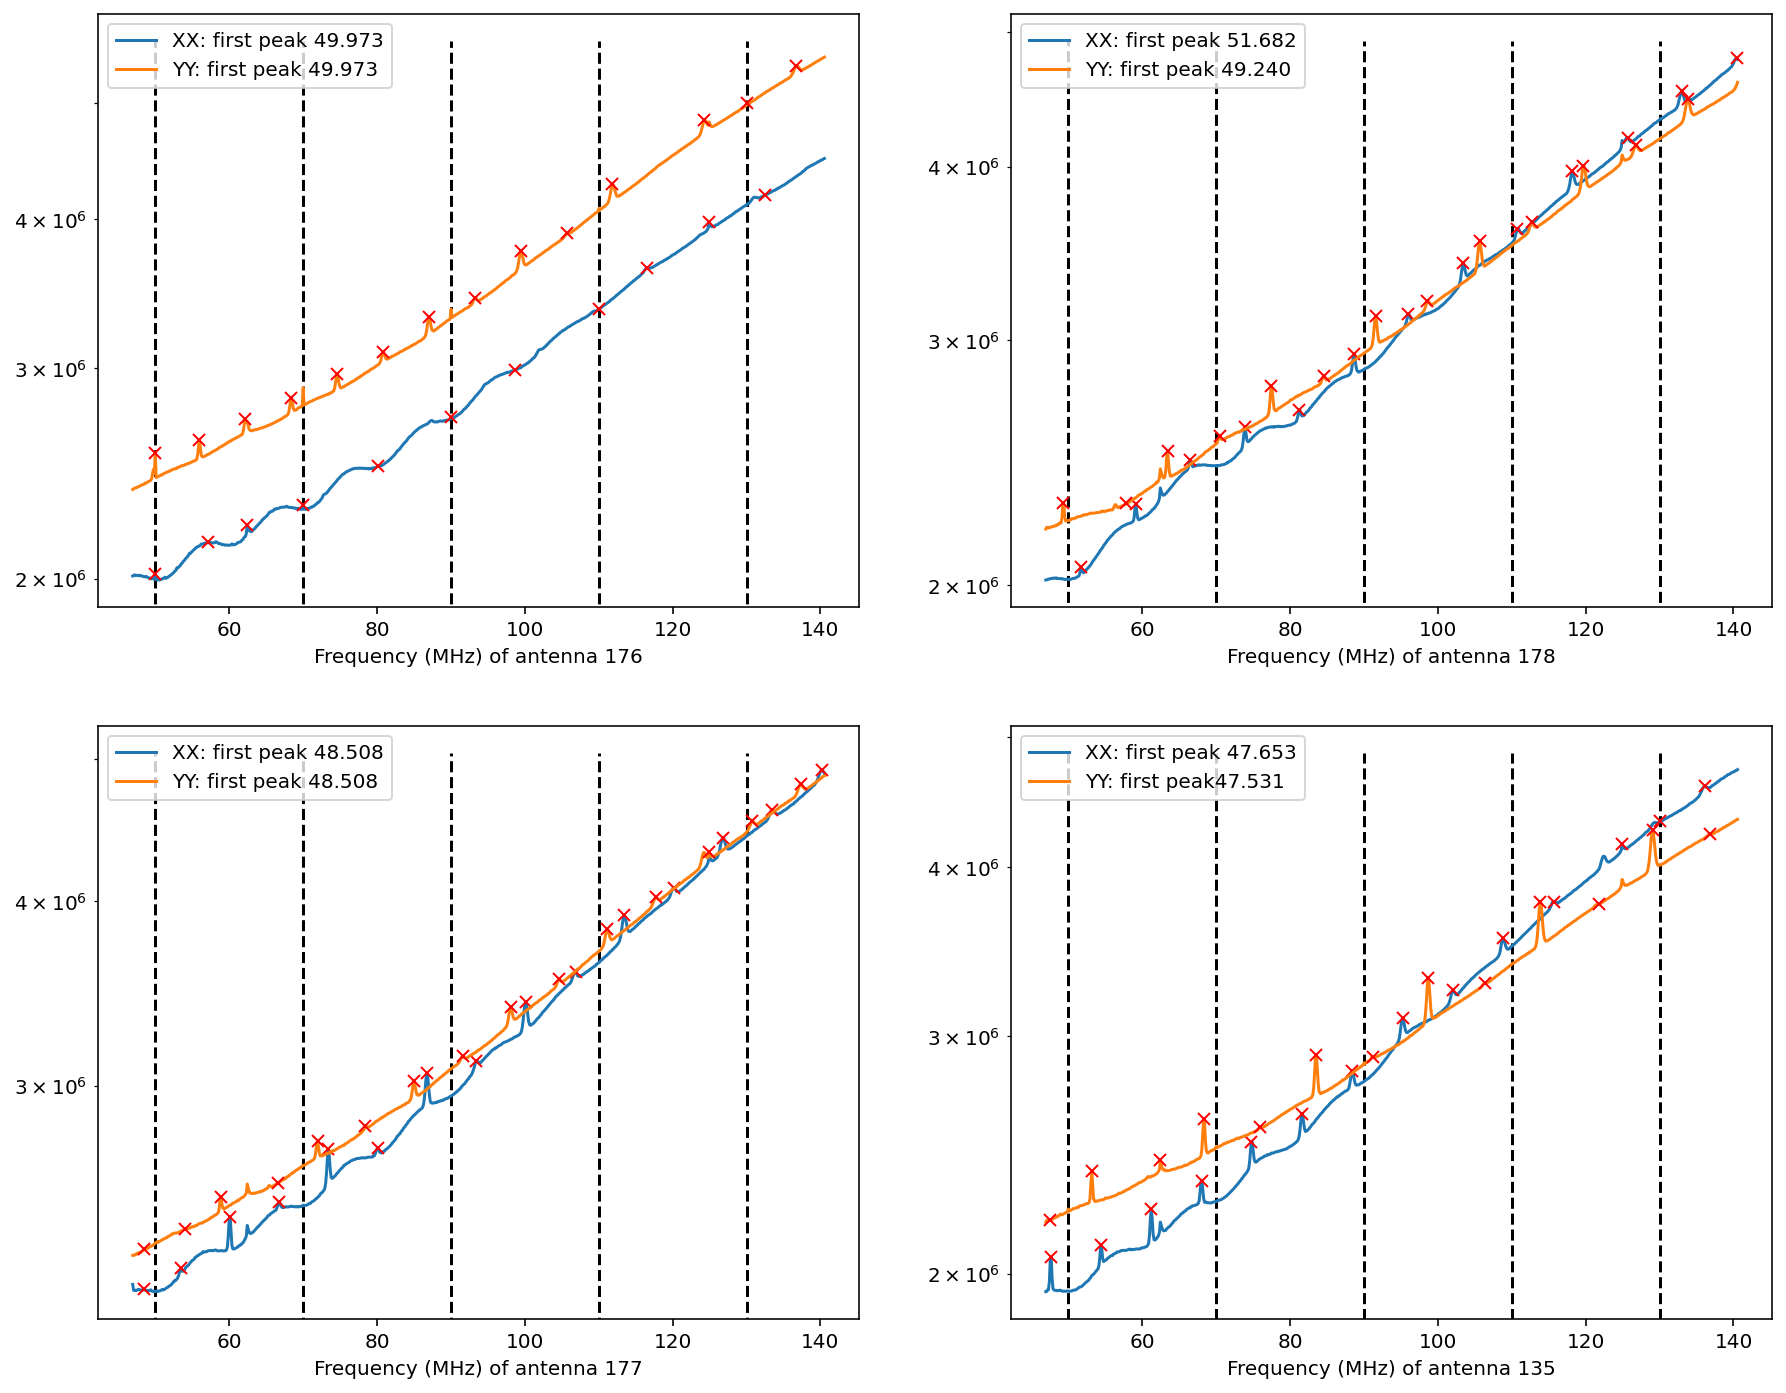

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [30]:
plot_four_noclocks_even(176, 178, 177, 135, 49.973, 20.025, 5)

[ 38  98 159 219 280 340 400 461 521 581 639 702 763]
[ 51.55944824  58.88366699  66.32995605  73.6541748   81.10046387
  88.42468262  95.74890137 103.19519043 110.51940918 117.84362793
 124.92370605]
[ 50.33874512  57.54089355  64.74304199  71.82312012  79.02526855
  86.22741699  93.42956543 100.63171387 107.8338623  115.03601074
 129.44030762]


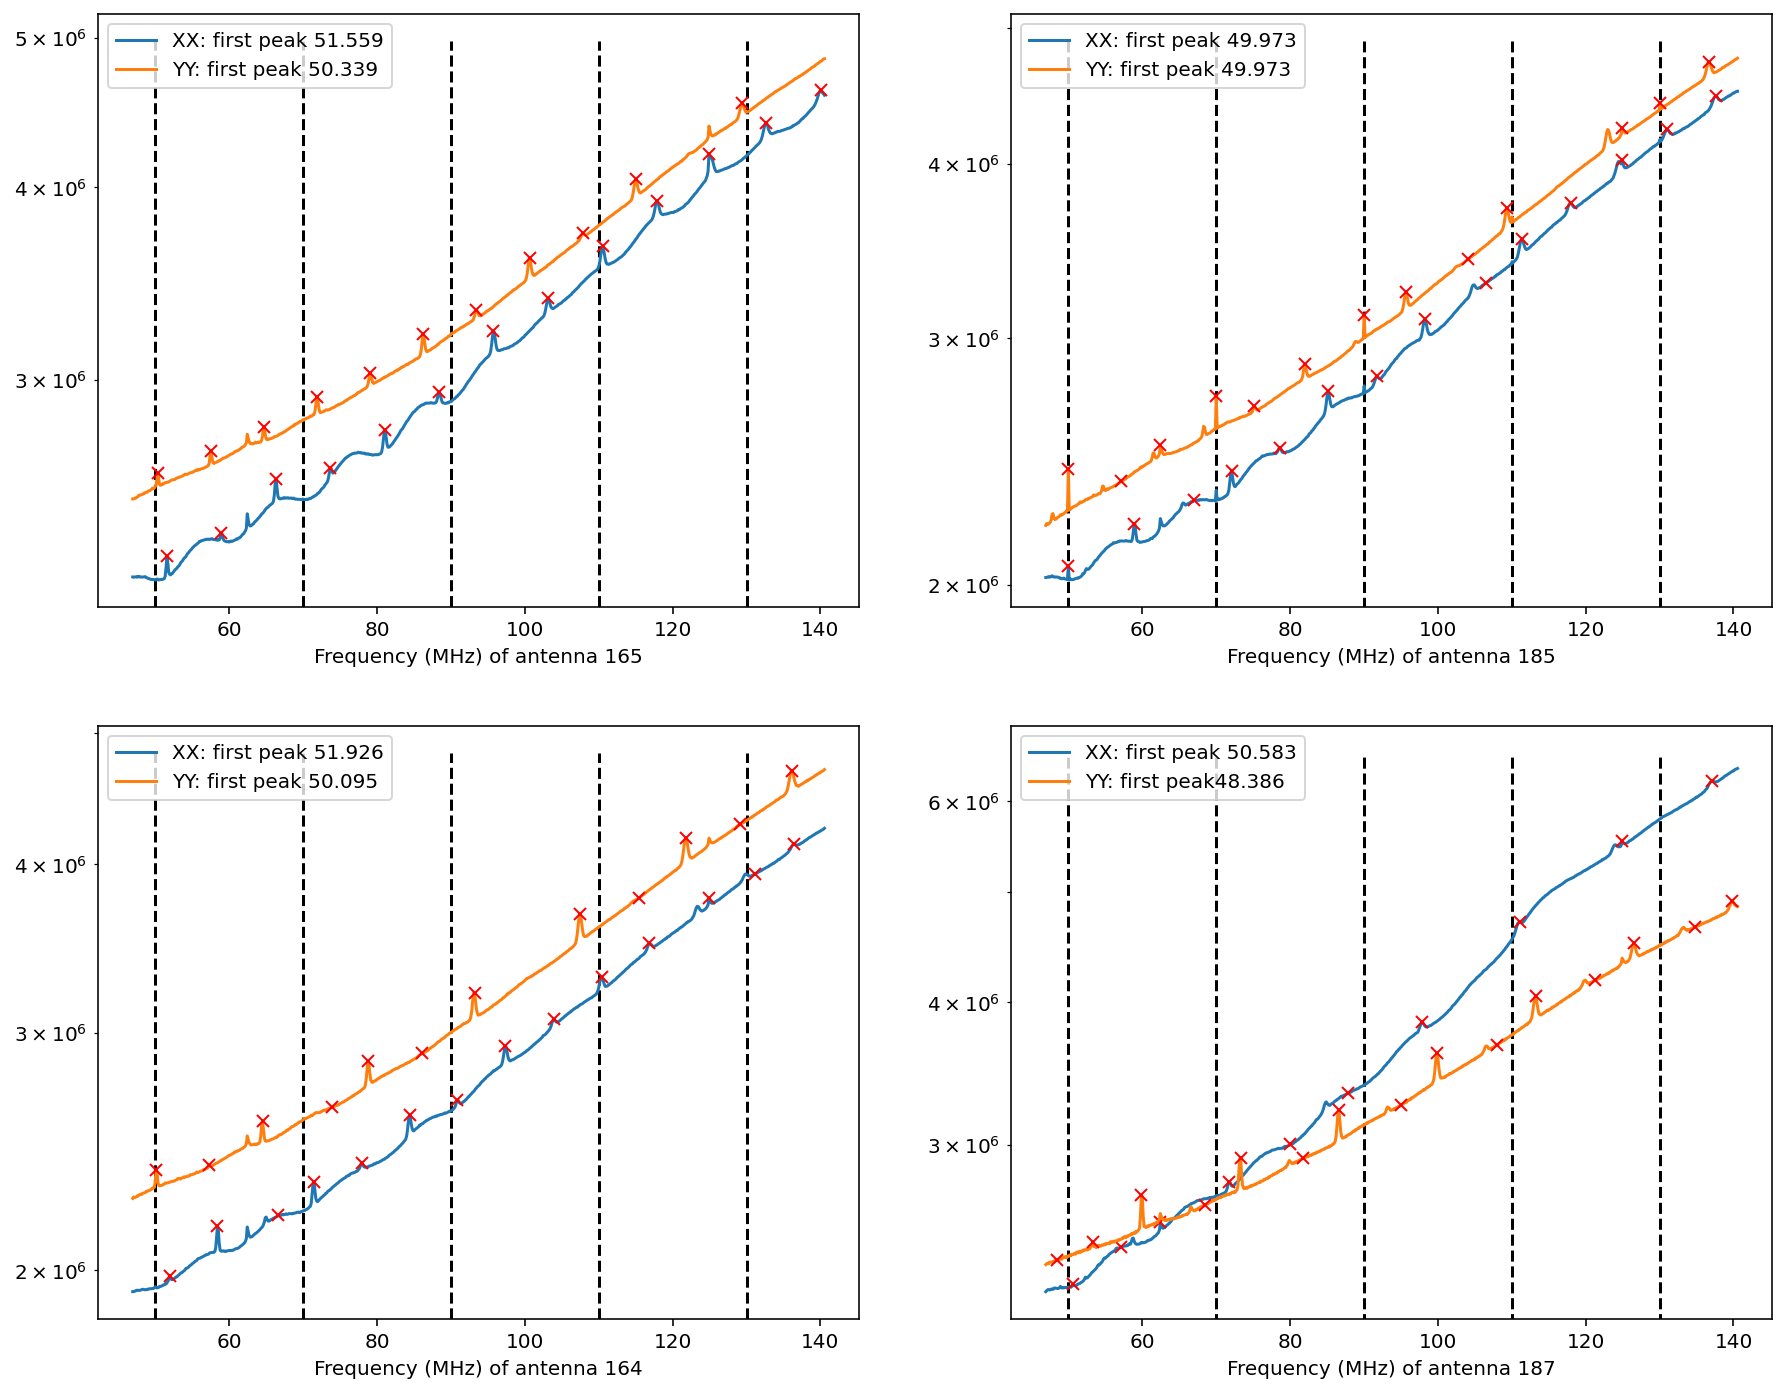

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [31]:
plot_four_noclocks_even(165, 185, 164, 187, 49.973, 20.025, 5)

[ 25  90 153 195 248 301 353 406 459 511 564 617 669 722 763]
[ 49.97253418  57.90710449  65.59753418  70.7244873   77.19421387
  83.66394043  90.01159668  96.48132324 102.9510498  109.29870605
 115.76843262]
[ 49.97253418  57.54089355  64.74304199  69.99206543  79.14733887
  84.88464355  90.01159668  95.74890137 100.75378418 107.8338623
 115.03601074]


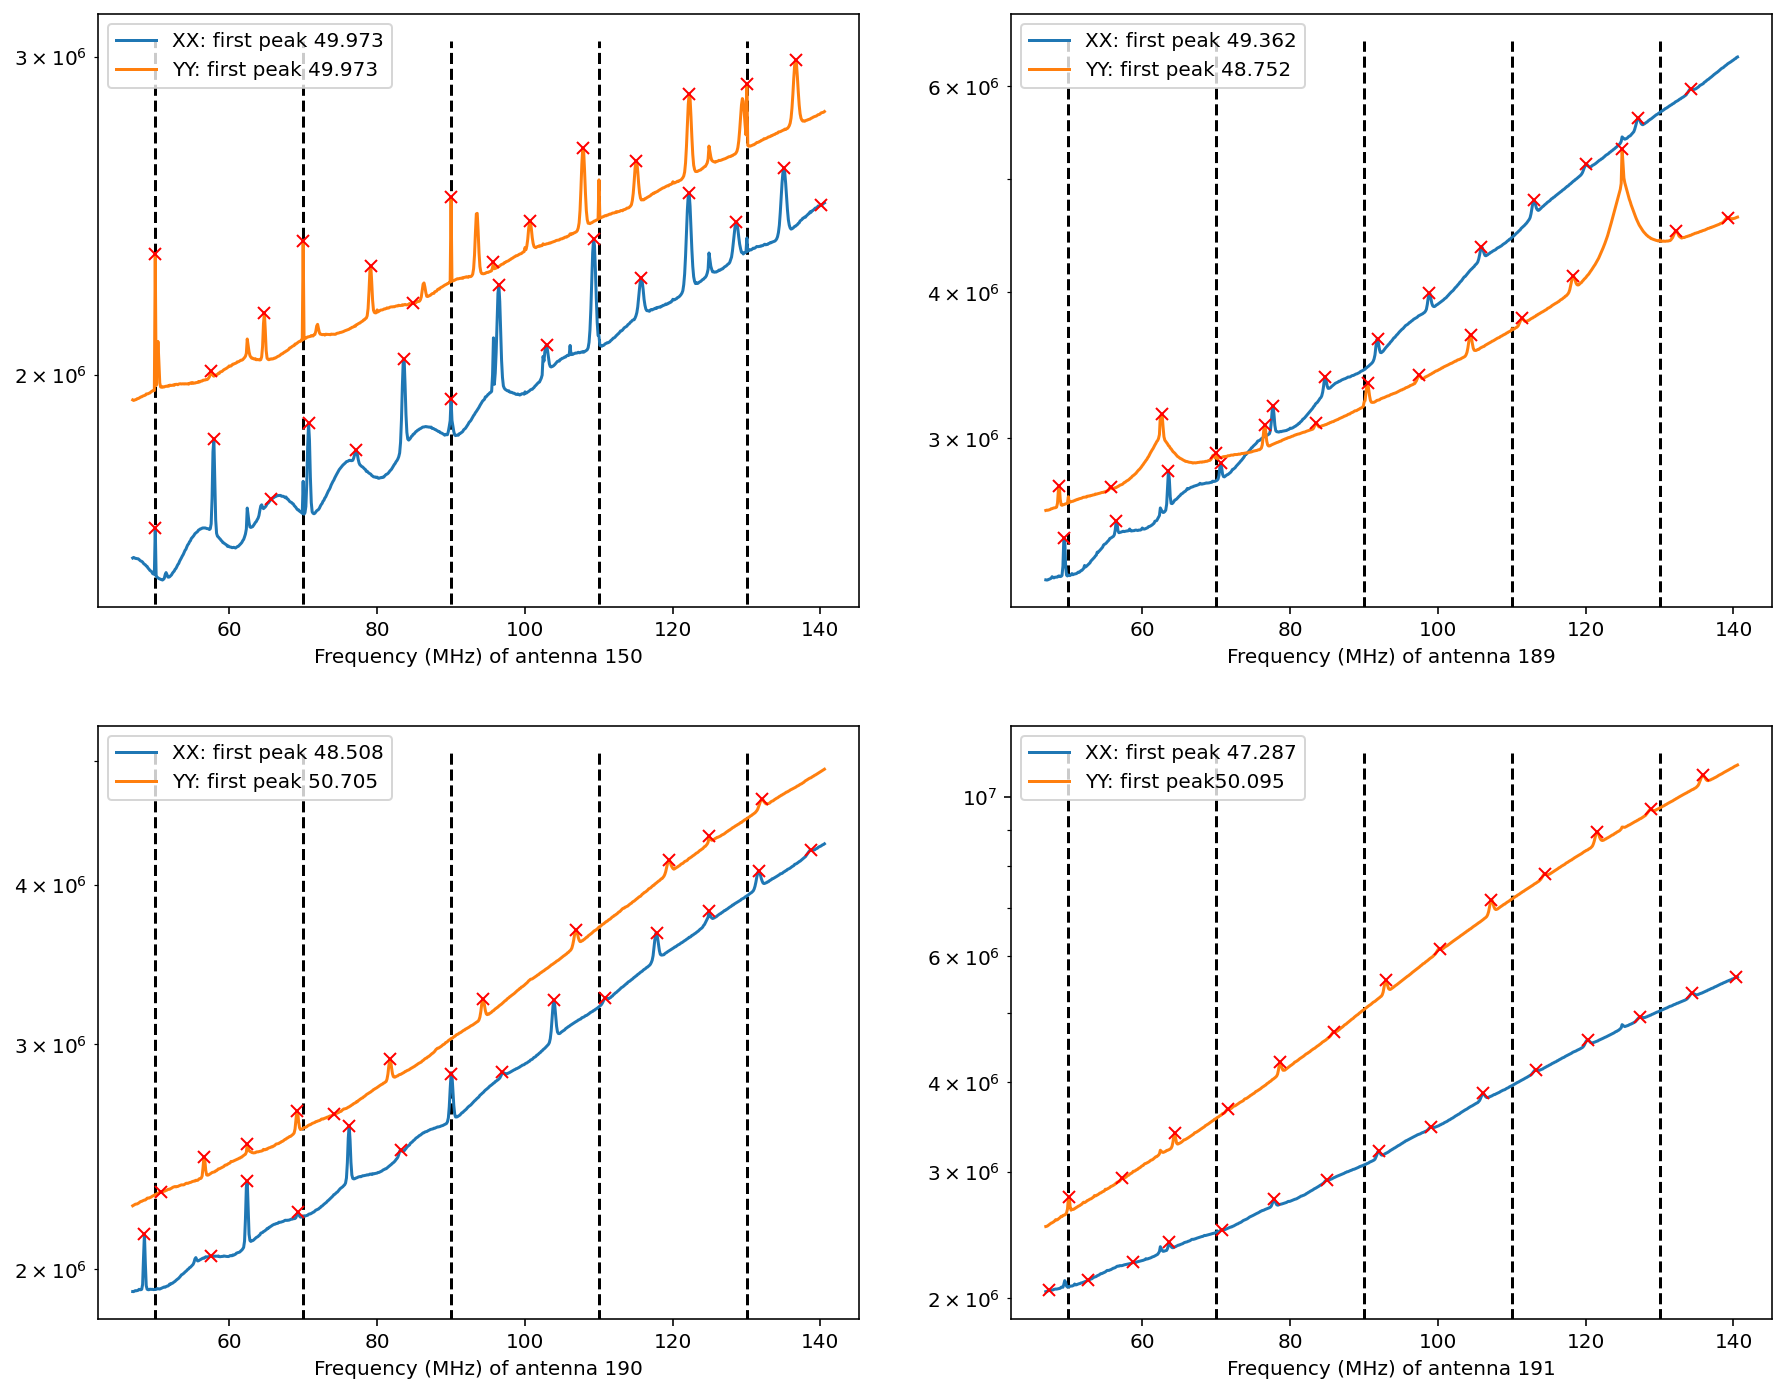

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [33]:
plot_four_noclocks_even(150, 189, 190, 191, 49.973, 20.025, 5)